<font size='4'>
    <b> Welcome to: How Dance Changed Over Decades </b><br><br>
    Includes:<br>
    <u> Part 1: Video Motion Detector Model - Time Series Dataset Generation Output Files: </u><br>
    <ul>
        <li> Aggregated Distances </li>
        <li> Delta Distances </li>
        <li> Unique and Frequent Moves </li>
        <li> Movement States </li>
        <li> Pose Landmark Coordinates </li>
    </ul>
    <u> Part 2: Time Series Video Analysis & Evaluation </u><br><br>
    Author:<br>
    Edo Lior<br>
    BGU ISE 2024
</font>

# Setup

In [1]:
# Installations - if not using environment

# !pip install pytube
# !pip install imageai
# !pip install mediapipe
# !pip install pytesseract
# !pip install motiontrackerbeta
# !pip install face_recognition
# !pip install -q ultralytics
# !pip install google-colab
# !sudo apt install tesseract-ocr
# !sudo apt install libtesseract-dev

In [2]:
import os
import shutil

from pytube import YouTube
import cv2
import pytesseract
from PIL import Image
from IPython.display import display, Image, Video, HTML, clear_output
from base64 import b64encode

import pandas as pd
import numpy as np
from collections import defaultdict
import random
from tqdm import tqdm

import seaborn as sns
import colorcet as cc
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
def check_gpu():
    """
    function checks GPU availability
    """
    gpu_info = !nvidia-smi
    gpu_info = '\n'.join(gpu_info)
    if gpu_info.find('failed') >= 0:
        print('Not connected to a GPU')
    else:
        print(f'Connected to GPU: {gpu_info}')

In [4]:
check_gpu()

Connected to GPU: Tue May 21 15:21:23 2024       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce GTX 1080 Ti     On  |   00000000:03:00.0 Off |                  N/A |
| 21%   35C    P8             10W /  250W |       1MiB /  11264MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------

# Video Dance Analysis

## Set Paths

<span style="font-size: 18px;"> Type here your <b> parent directory </b> of the project </span>

In [5]:
p_user = './'
p_user = '/sise/home/edoli/PycharmProjects/'

In [6]:
p_project = p_user+'Video-Motion-Detector/'
p_datasets = p_project+'datasets/'
p_data_video = p_datasets+'videos/'
p_data1 = p_data_video+'video1/'
p_frames1 = p_data1+'frames/'
p_plots = p_data1+'plots/'
p_video_url_pxl1 = 'https://www.pexels.com/download/video/5725960/'
p_video_url_ytb1 = 'https://www.youtube.com/watch?v=p-rSdt0aFuw&ab_channel=RicardoWalker'
p_video_url_ytb2 = 'https://www.youtube.com/watch?v=XpHnioELnGM&ab_channel=RicardoWalker'

In [7]:
if not os.path.exists(p_datasets):
    os.mkdir(p_datasets)

if not os.path.exists(p_data_video):
    os.mkdir(p_data_video)

if not os.path.exists(p_data1):
    os.mkdir(p_data1)

if not os.path.exists(p_frames1):
    os.mkdir(p_frames1)

if not os.path.exists(p_plots):
    os.mkdir(p_plots)

## Read Data

In [8]:
def get_video(p_data, p_video_url, s_video_name=None):
    """
    function downloads and saves video by a given url link input
    :param p_data: path to video dataset
    :param p_video_url: path to video url
    :param s_video_name: name of video
    """
    try:
        if 'youtube' in p_video_url:
            curr_video = YouTube(p_video_url)
            video_stream = curr_video.streams.get_highest_resolution()
            video_filename = curr_video.title + '.mp4'
            punctuations = "!\"#$%&()'*+,/:;<=>?@[\\]^_`{|}~"
            video_filename = "".join([char if char not in punctuations else "" for char in video_filename])
            video_filename = video_filename.strip()
            video_filename = video_filename.replace(' ', '_')
            video_stream.download(output_path=p_data, filename=video_filename)
            p_destination = p_data + video_filename
        elif 'pexels' in p_video_url:
            !wget -O ./video1.mp4 https://www.pexels.com/download/video/5725960/
            video_filename = s_video_name + '.mp4'
            p_source = './' + video_filename
            p_destination = p_data + video_filename
            shutil.move(p_source, p_destination)
        return p_destination
    except Exception as e:
        print(f'Error: {e}')

In [9]:
def remove_dir_with_files(p_dir):
    """
    function removes directory recursive
    :param p_dir: path to directory
    """
    shutil.rmtree(p_dir)
    print(f'Directory {p_dir} removed successfully.')

def remove_dir_empty(p_dir):
    """
    function removes empty directory
    :param p_dir: path to directory
    """
    os.rmdir(dir_path)
    print(f'Directory {p_dir} removed successfully.')

In [10]:
p_remove = p_data_video+'datasets/'
# remove_dir_with_files(p_remove)

p_remove = p_data1+"video1.mp4"
p_remove = p_data1+"אלמוגכהןבמסרמעלבימתהכנסתליחייאסנוואר(ערוץכנסת).mp4"
p_remove = p_data1+"The Evolution of Dance - 1950 to 2019 - By Ricardo Walker's Crew.mp4"
p_remove = p_data1+"TheEvolutionofDance-1950to2019-ByRicardoWalker'sCrew.mp4"
# remove_dir_empty(p_remove)

In [11]:
# Read Video 1

s_video1 = 'The_Evolution_of_Dance_-_1950_to_2019_-_By_Ricardo_Walkers_Crew.mp4'
p_video1 = p_data1+s_video1
if not os.path.exists(p_video1):
    p_video1 = get_video(p_data1, p_video_url_ytb1)  # downloads input video url
p_video1

'/sise/home/edoli/PycharmProjects/Video-Motion-Detector/datasets/videos/video1/The_Evolution_of_Dance_-_1950_to_2019_-_By_Ricardo_Walkers_Crew.mp4'

In [12]:
# Read Video 2

s_video2 = 'The_Evolution_of_Dance_-_1950_to_2022_-_By_Ricardo_Walkers_Crew_Part_2.mp4'
p_video2 = p_data1+s_video2
if not os.path.exists(p_video2):
    p_video2 = get_video(p_data1, p_video_url_ytb2)  # downloads input video url
p_video2

'/sise/home/edoli/PycharmProjects/Video-Motion-Detector/datasets/videos/video1/The_Evolution_of_Dance_-_1950_to_2022_-_By_Ricardo_Walkers_Crew_Part_2.mp4'

## Preprocess

In [13]:
# Features

l_labels_decades = ['1950', '1960', '1970', '1980', '1990', '2000', '2010'] 

l_features_distances = ['distance_all_body', 'distance_head', 'distance_upper_body', 'distance_lower_body',
                        'distance_arms', 'distance_legs',
                        'distance_left_arm', 'distance_right_arm', 'distance_left_leg', 'distance_right_leg']

l_features_deltas = ['delta_all_body', 'delta_head', 'delta_upper_body', 'delta_lower_body', 'delta_arms',
                     'delta_legs',
                     'delta_left_arm', 'delta_right_arm', 'delta_left_leg', 'delta_right_leg',
                     'delta_left_shoulder', 'delta_right_shoulder', 'delta_left_elbow', 'delta_right_elbow',
                     'delta_left_wrist', 'delta_right_wrist',
                     'delta_left_hip', 'delta_right_hip', 'delta_left_knee', 'delta_right_knee', 'delta_left_ankle',
                     'delta_right_ankle'
                     ]

l_features_moves = ['left_arm_up', 'left_arm_down', 'left_leg_up', 'left_leg_down',
                    'right_arm_up', 'right_arm_down', 'right_leg_up', 'right_leg_down',
                    'jump', 'duck'
                    ]

l_features_states = ['state_left_arm_up', 'state_left_arm_down', 'state_left_leg_up', 'state_left_leg_down',
                     'state_right_arm_up', 'state_right_arm_down', 'state_right_leg_up', 'state_right_leg_down',
                     'state_jump', 'state_duck'
                     ]

In [14]:
def get_crop(img):
    """
    :param img: current frame
    :return: imaged cropped
    """
    width, height = img.size
    corner_size = 100  # bottom-right corner
    x1 = width - corner_size
    y1 = height - corner_size
    x2 = width
    y2 = height
    cropped_img = img.crop((x1, y1, x2, y2))  # crops image
    return cropped_img

def get_text(curr_frame, curr_cv2):
    """
    function extracts text from video frames and creates dictionary of video frame windows
    :param curr_frame: current frame
    :param curr_cv2: current cv2
    :return: video title, start frame and end frame
    """
    try:
        pytesseract.pytesseract.tesseract_cmd = r'/usr/bin/tesseract'      
        curr_frame = get_crop(curr_frame)
        curr_frame = curr_frame.astype('uint8')
        curr_frame = curr_cv2.cvtColor(curr_frame, curr_cv2.COLOR_BGR2RGB)
        # _config = '--psm 7'  # single line text
        # _config = '--psm 6'  # uniform block single line
        _config = '--psm 3'  # full segment
        curr_text = pytesseract.image_to_string(curr_frame, lang='eng', config=_config)
        curr_text = curr_text.strip()       
        return curr_text
    except Exception as e:
        print(f'Error processing image: {e}')
        return ''
    
def preprocess_video(curr_video, cv2):
    """
    functions performs video preprocessing
    :param curr_video: current vido
    """
    sum_frames_total = 0
    i_window_size_modulo = 1
    i_window_size_modulo = 5
    
    i_frames = int(curr_video.get(cv2.CAP_PROP_FRAME_COUNT))
    print(f'Number of frames for current video: {i_frames}')
    
    for i_frame in tqdm(range(i_frames)):
        success, frame = curr_video.read()
        
        if not success:
            print("Ignoring empty camera frame.")
            continue

        if curr_video_timeframe_start <= i_frame <= curr_video_timeframe_end:
            
            if i_frame%i_window_size_modulo==0:
                print(f'Frame Number: {i_frame}')
                curr_text = get_text(frame, cv2)            

    curr_video.release()
    cv2.destroyAllWindows()

In [15]:
# Preprocess Video 1 - Creates dictionary of frame windows

d_frame_windows1 = {'1950': {'singing in the rain': [145, 325],
                     'hound dog': [335, 575],
                     'tutti frutti': [595, 715]
                     },
            '1960': {'lets twist again': [750, 845],
                     'i feel good': [885, 1090],
                     'i want you back': [1125, 1360]
                     },
			'1970': {'stayin alive': [1395, 1630],
                     'dancing machine': [1665, 1805],
                     'shake your body': [1825, 1905],
					 'youre the one that i want': [1950, 2005]
                     },
			'1980': {'time of my life': [2040, 2150],
                     'billie jean': [2220, 2545],
					 'rhythm nation': [2575, 2740],
					 'footloose': [2770, 2935],
					 'thriller': [2960, 3165],
					 'what a feeling': [3200, 3310]
                     },
			'1990': {'u cant touch this': [3345, 3390],
                     'black or white': [3425, 3600],
                     'vogue': [3625, 3875],
					 'its not unusual': [3910, 4080],
					 'everybody': [4110, 4355],
					 'macarena ': [4385, 4620]
                     },
			'2000': {'crank that': [4665, 4930],
                     'single ladies': [4965, 5095],
                     'bye bye bye': [5125, 5405],
					 'ragatanga': [5435, 5585]
                     },
			'2010': {'gangnam style': [5615, 5825],
                     'despacito': [5855, 6095],
                     'uptown funk': [6125, 6340],
					 'party rock anthem': [6375, 6555],
					 'cant stop the feeling': [6595, 6755],
					 'watch me': [6785, 6960],
					 'swish swish': [6995, 7255],
					 'in my feeling': [7285, 7585],
					 'old town road': [7620, 7860]
                     }
           }
# curr_video1 = cv2.VideoCapture(p_video1)
# preprocess_video(curr_video1, cv2)

In [16]:
# Preprocess Video 2 - Creates dictionary of frame windows

d_frame_windows2 = {'1950': {'jailhouse rock': [165, 415]
                            },
                    '1960': {'west side story': [445, 555]
                            },
        			'1970': {'the love you save': [595, 805],
                             'sex machine': [830, 1010],
                             'you should be dancing': [1045, 1205],
                             'ymca': [1225, 1450],
                             'greased lightning': [1485, 1730]
                            },
        			'1980': {'beat it': [1750, 2145],
        					 'maniac': [2165, 2390],
        					 'smooth criminal': [2420, 2680],
                             'i miss you much': [2710, 2930]
                            },
        			'1990': {'ice ice baby': [2960, 3155],
        					 'dangerous': [3180, 3545],
        					 'as long as you love me': [3580, 3820],
                             'men in black': [3855, 4085]
                            },
        			'2000': {'oops i did it again': [4145, 4330],
                             'drop': [4350, 4585],
                             'rock your body': [4620, 4745],
                             '1 2 step': [4770, 5010],
                             'yeah': [5025, 5265],
                             'gimme that': [5290, 5545],
                             'lose control': [5570, 5810],
                             'hung up': [5835, 6000],
                             'get right': [6025, 6175],
                             'walk it out': [6200, 6340],
                             'bad romance': [6370, 6595]
                            },
        			'2010': {'somebody to love': [6640, 6820],
                             'teach me how to dougie': [6860, 6950],
        					 'one in a million': [6985, 7275],
                             'waka waka': [7300, 7485],
                             'run the world': [7515, 7755],
        					 'harlem shake': [7790, 8120],
                             'dope': [8145, 8420],
        					 '24k magic': [8450, 8745]
                            }
                   }
# curr_video2 = cv2.VideoCapture(p_video2)
# preprocess_video(curr_video2, cv2)

## Movement Features Definition

In [17]:
import mediapipe as mp
from mediapipe.tasks import python
from mediapipe.tasks.python import vision

2024-05-21 15:21:57.563716: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-21 15:21:57.563750: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-21 15:21:57.563758: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-05-21 15:21:59.711180: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


## MediaPipe Pose Landmark Locations

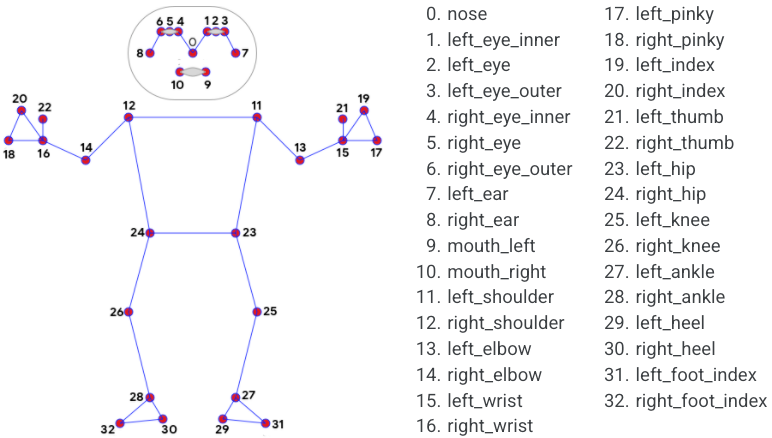

In [18]:
p_mediapipe_landmarks = "https://mediapipe.dev/images/mobile/pose_tracking_full_body_landmarks.png"
Image(p_mediapipe_landmarks, width=590, height=334)

In [19]:
def plot_object_status(frame, i_frame, loc_object, s_feature, f_angle, curr_state, i_count, curr_cv2):
    """
    function plots movement feature status box
    :param frame: current frame of video
    :param i_frame: index of frame
    :param loc_object: location in image
    :param s_feature: current movement feature
    :param f_angle: current movement angle
    :param curr_state: current movement state
    :param i_count: movement counter
    :param curr_cv2: current cv2
    """
    curr_label = 'Motion: '+s_feature
    curr_font = curr_cv2.FONT_HERSHEY_SIMPLEX
    color_white = (255, 255, 255)  # label text color - white
    color_black = (0, 0, 0)  # label text color - black
    text_size = 30
    curr_cv2.putText(frame, str(f_angle), loc_object, curr_font, 0.5, color_white, 2, curr_cv2.LINE_AA)
    curr_cv2.rectangle(frame, (0, 0), (225, 73), (245, 117, 16), -1)
    curr_cv2.putText(frame, 'Move: ', (15, 12), curr_font, 0.5, color_white, 1, curr_cv2.LINE_AA)
    curr_cv2.putText(frame, str(i_count), (10, 60), curr_font, 2, color_white, 2, curr_cv2.LINE_AA)
    curr_cv2.putText(frame, 'State: ', (65, 12), curr_font, 0.5, color_white, 1, curr_cv2.LINE_AA)
    curr_cv2.putText(frame, curr_state, (60, 60), curr_font, 2, color_white, 2, curr_cv2.LINE_AA)
    return frame, curr_cv2

In [20]:
def calculate_distance(curr_point_norm, prev_point_norm):
    """
    function calculates Euclidean distance between input coordinates
    :param curr_point_norm: current frame motion recognition coordinates normalized
    :param prev_point_norm: previous frame motion recognition coordinates normalized
    :return: distance value
    """
    euclidean_distance = 0
    if curr_point_norm is not None and prev_point_norm is not None:
        try:
            if isinstance(curr_point_norm, float) or isinstance(prev_point_norm, float):  # type distances deltas
                euclidean_distance = curr_point_norm - prev_point_norm
            else:  # type normalized coordinates
                euclidean_distance = np.sqrt(np.power(np.subtract(curr_point_norm.x, prev_point_norm.x), 2) + np.power(np.subtract(curr_point_norm.y, prev_point_norm.y), 2))
        except AttributeError as ae:
            print(f'Distance calculation error: {ae}')
    if isinstance(euclidean_distance, float):
        euclidean_distance = round(euclidean_distance, 3)
    return euclidean_distance

def set_format(df_curr, l_cols, _type):
    """
    function validates series type in a dataframe
    :param df_curr: current dataframe
    :param l_cols: columns to validate
    :param _type: variable type validation
    """
    for curr_col in l_cols:
        df_curr[curr_col] = df_curr[curr_col].astype(_type)
    return df_curr
        
def save_frame(frame, p_output_prefix_frames, id, curr_cv2):
    """
    functions save frame
    :param frame: current frame
    :param p_output_prefix_frames: path to write
    :param id: frame id
    :param curr_cv2: current cv2
    """
    _extension = '.png'
    p_save = f'{p_output_prefix_frames}{id}{_extension}'
    print(f'Save Path: {p_save}')
    curr_cv2.imwrite(p_save, frame)

def plot_frame(frame, id, curr_cv2):
    """
    functions plots frame
    :param frame: current frame
    :param id: frame id
    :param curr_cv2: current cv2
    """
    _text = str(id)
    # frame = Image.fromarray(frame)
    if isinstance(frame, np.ndarray):
        plt.imshow(frame, interpolation='nearest')
        plt.title(f'Frame: {_text}')
        plt.axis('off')  # hides axes
        plt.show()
        plt.clf()
    elif isinstance(frame, Image.Image):
        display(frame)

def calculate_angle(a, b, c):
    """
    function calculates angle per given frame and 3 coordinates
    :param a: 1st coordinate
    :param b: 2nd middle coordinate
    :param c: 3rd coordinate
    :return: angle degrees of motion
    """
    a = np.array(a)  # left side
    b = np.array(b)  # middle
    c = np.array(c)  # right side

    radians = np.arctan2(c[1] - b[1], c[0] - b[0]) - np.arctan2(a[1] - b[1], a[0] - b[0])
    angle = np.abs(radians * 180.0 / np.pi)

    if angle > 180.0:
        angle = 360 - angle

    return angle

def set_unique_move(curr_angle, curr_state, thresh_degree, curr_count, curr_type, curr_direction, i_frame_total):
    """
    function sets movement features per frame
    :param curr_angle: angle of motion
    :param curr_state: state of motion
    :param thresh_degree: motion degree threshold for changing state
    :param curr_count: motion counter
    :param curr_type: motion type
    :param curr_direction: motion direction
    :param i_frame_total: frame index
    :return: update of movement state and counter
    """
    if curr_type == 'arm':
        if curr_angle >= thresh_degree and (curr_state == 'down' or curr_state is None):
            if curr_direction == 'up':
                curr_count += 1
            curr_state = 'up'
        elif curr_angle < thresh_degree and (curr_state == 'up' or curr_state is None):
            if curr_direction == 'down':
                curr_count += 1
            curr_state = 'down'
    elif curr_type == 'arm_side':
        if curr_angle < thresh_degree and (curr_state == 'down' or curr_state is None):
            if curr_direction == 'up':
                curr_count += 1
            curr_state = 'up'
        elif curr_angle >= thresh_degree and (curr_state == 'up' or curr_state is None):
            if curr_direction == 'down':
                curr_count += 1
            curr_state = 'down'
    elif curr_type == 'leg':
        if curr_angle < thresh_degree and (curr_state == 'down' or curr_state is None):
            if curr_direction == 'up':
                curr_count += 1
            curr_state = 'up'
        elif curr_angle >= thresh_degree and (curr_state == 'up' or curr_state is None):
            if curr_direction == 'down':
                curr_count += 1
            curr_state = 'down'
    elif curr_type == 'leg_side':
        if curr_angle < thresh_degree and (curr_state == 'down' or curr_state is None):
            if curr_direction == 'up':
                curr_count += 1
            curr_state = 'up'
        elif curr_angle >= thresh_degree and (curr_state == 'up' or curr_state is None):
            if curr_direction == 'down':
                curr_count += 1
            curr_state = 'down'
    elif curr_type == 'jump':
        if curr_angle < thresh_degree and (curr_state == 'down' or curr_state is None):
            curr_count += 1
            curr_state = 'up'
        else:
            curr_state = 'down'
    elif curr_type == 'duck':
        if curr_angle > thresh_degree and (curr_state == 'up' or curr_state is None):
            curr_count += 1
            curr_state = 'down'
        else:
            curr_state = 'up'
    # print(f'Frame: {i_frame_total}, Type: {curr_type}, State: {curr_state}, Movements: {curr_count}, Angle: {curr_angle}')
    return curr_count, curr_state

In [21]:
def motion_dector_features(curr_video, p_data, p_frames, d_frame_windows, s_video, cv2):
    """
    functions runs: Feature Detector Model
    dance automation for unique moves recognition
    Notes: left gesture = located right in image
    :param curr_video: current video
    :param p_data: path to data directory
    :param d_frame_windows: window sizes of frames
    :param s_video: video title
    """
    mp_drawing = mp.solutions.drawing_utils
    mp_pose = mp.solutions.pose
    m_pose = mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5)

    i_frame_total = 0  # global videos index frame (all)
    d_logs = defaultdict(str)  # logs of frames with errors

    thresh_arm_up, thresh_arm_up_side = 25, 180
    thresh_leg_up, thresh_leg_up_side = 160, 165
    thresh_jump, thresh_duck = 160, 330

    # frame_height, frame_width = frame.shape[0], frame.shape[1]  # <height=720, width=1280>
    # print(f'Frame Height: {frame_height}, Frame Width: {frame_width}')
    frame_height, frame_width = 720, 1280

    l_windows_modulo = [1, 3, 5]  # window sizes for each video: skips every X frames
    # i_modulo_video_frames = 1
    # i_modulo_video_frames = 3
    i_modulo_video_frames = 5

    for curr_movement_feature, l_curr_timestamps in d_frame_windows.items():
        p_output_prefix_frames = p_frames + curr_movement_feature + '/'
        if not os.path.exists(p_output_prefix_frames):
            os.mkdir(p_output_prefix_frames)
        curr_video_timeframe_start, curr_video_timeframe_end = l_curr_timestamps[0], l_curr_timestamps[1]

        state_arm_left_up, state_arm_right_up = None, None
        state_arm_left_down, state_arm_right_down = None, None
        state_leg_left_up, state_leg_right_up = None, None
        state_leg_left_down, state_leg_right_down = None, None
        state_jump, state_duck = None, None

        while i_frame_total < curr_video_timeframe_start:  # sets first frame index video
            success, frame = curr_video.read()
            i_frame_total += 1
            if not success:
                d_logs[i_frame_total] = 'NA'
                print(f'Frame Error: {i_frame_total}, Ignoring empty camera frame.')

        while curr_video_timeframe_start <= i_frame_total <= curr_video_timeframe_end:
            if i_frame_total % i_modulo_video_frames == 0:  # constraint frames windows sizes - analyzed
                count_arm_left_up, count_arm_right_up, count_arm_left_down, count_arm_right_down = 0, 0, 0, 0
                count_leg_left_up, count_leg_right_up, count_leg_left_down, count_leg_right_down = 0, 0, 0, 0
                count_jump, count_duck = 0, 0

                frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)  # to RGB

                results = m_pose.process(frame)

                frame = cv2.cvtColor(frame, cv2.COLOR_RGB2BGR)  # to BGR

                if results.pose_landmarks:
                    mp_drawing.draw_landmarks(frame, results.pose_landmarks, mp_pose.POSE_CONNECTIONS)
                    landmarks = results.pose_landmarks.landmark

                    # movement recognition:
                    left_wrist, right_wrist = landmarks[mp_pose.PoseLandmark.LEFT_WRIST], landmarks[
                        mp_pose.PoseLandmark.RIGHT_WRIST]
                    left_elbow, right_elbow = landmarks[mp_pose.PoseLandmark.LEFT_ELBOW], landmarks[
                        mp_pose.PoseLandmark.RIGHT_ELBOW]
                    left_shoulder, right_shoulder = landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER], landmarks[
                        mp_pose.PoseLandmark.RIGHT_SHOULDER]
                    left_leg_index, right_leg_index = landmarks[mp_pose.PoseLandmark.LEFT_FOOT_INDEX], landmarks[
                        mp_pose.PoseLandmark.RIGHT_FOOT_INDEX]
                    left_ankle, right_ankle = landmarks[mp_pose.PoseLandmark.LEFT_ANKLE], landmarks[
                        mp_pose.PoseLandmark.RIGHT_ANKLE]
                    left_knee, right_knee = landmarks[mp_pose.PoseLandmark.LEFT_KNEE], landmarks[
                        mp_pose.PoseLandmark.RIGHT_KNEE]
                    left_hip, right_hip = landmarks[mp_pose.PoseLandmark.LEFT_HIP], landmarks[
                        mp_pose.PoseLandmark.RIGHT_HIP]
                    head = landmarks[mp_pose.PoseLandmark.NOSE]

                    # calculates motions unique moves
                    left_shoulder_loc, right_shoulder_loc = [left_shoulder.x, left_shoulder.y], [right_shoulder.x, right_shoulder.y]
                    left_elbow_loc, right_elbow_loc = [left_elbow.x, left_elbow.y], [right_elbow.x, right_elbow.y]
                    left_wrist_loc, right_wrist_loc = [left_wrist.x, left_wrist.y], [right_wrist.x, right_wrist.y]
                    left_hip_loc, right_hip_loc = [left_hip.x, left_hip.y], [right_hip.x, right_hip.y]
                    left_knee_loc, right_knee_loc = [left_knee.x, left_knee.y], [right_knee.x, right_knee.y]
                    left_ankle_loc, right_ankle_loc = [left_ankle.x, left_ankle.y], [right_ankle.x, right_ankle.y]
                    left_leg_index_loc, right_leg_index_loc = [left_leg_index.x, left_leg_index.y], [right_leg_index.x, right_leg_index.y]

                    # locations (frame)
                    frame_elbow = tuple(np.multiply([left_elbow.x, left_elbow.y], [frame_width, frame_height]).astype(int))  # <width, height>
                    frame_knee = tuple(np.multiply([left_knee.x, left_knee.y], [frame_width, frame_height]).astype(int))
                    frame_head_x, frame_head_y = tuple(np.multiply([head.x, head.y], [frame_width, frame_height]).astype(int))

                    # left hand up and down
                    if left_wrist.y >= left_elbow.y:  # case: left hand facing left (frame y axes values are ordered opposite)
                        angle_arm_left = calculate_angle(left_hip_loc, left_shoulder_loc, left_elbow_loc)
                        count_arm_left_up, state_arm_left_up = set_unique_move(angle_arm_left, state_arm_left_up,
                                                                               thresh_arm_up, count_arm_left_up,
                                                                               'arm', 'up', i_frame_total)
                        count_arm_left_down, state_arm_left_down = set_unique_move(angle_arm_left,
                                                                                   state_arm_left_down,
                                                                                   thresh_arm_up,
                                                                                   count_arm_left_down, 'arm',
                                                                                   'down', i_frame_total)
                    else:  # case: left hand facing right
                        angle_arm_left = calculate_angle(left_shoulder_loc, left_elbow_loc, left_wrist_loc)
                        count_arm_left_up, state_arm_left_up = set_unique_move(angle_arm_left, state_arm_left_up,
                                                                               thresh_arm_up_side,
                                                                               count_arm_left_up, 'arm_side', 'up',
                                                                               i_frame_total)
                        count_arm_left_down, state_arm_left_down = set_unique_move(angle_arm_left,
                                                                                   state_arm_left_down,
                                                                                   thresh_arm_up_side,
                                                                                   count_arm_left_down, 'arm_side',
                                                                                   'down', i_frame_total)

                    # right hand up and down
                    if right_wrist.y >= right_elbow.y:
                        angle_arm_right = calculate_angle(right_hip_loc, right_shoulder_loc, right_elbow_loc)
                        count_arm_right_up, state_arm_right_up = set_unique_move(angle_arm_right,
                                                                                 state_arm_right_up, thresh_arm_up,
                                                                                 count_arm_right_up, 'arm', 'up',
                                                                                 i_frame_total)
                        count_arm_right_down, state_arm_right_down = set_unique_move(angle_arm_right,
                                                                                     state_arm_right_down,
                                                                                     thresh_arm_up,
                                                                                     count_arm_right_down, 'arm',
                                                                                     'down', i_frame_total)
                    else:
                        angle_arm_right = calculate_angle(right_shoulder_loc, right_elbow_loc, right_wrist_loc)
                        count_arm_right_up, state_arm_right_up = set_unique_move(angle_arm_right,
                                                                                 state_arm_right_up,
                                                                                 thresh_arm_up_side,
                                                                                 count_arm_right_up, 'arm_side',
                                                                                 'up', i_frame_total)
                        count_arm_right_down, state_arm_right_down = set_unique_move(angle_arm_right,
                                                                                     state_arm_right_down,
                                                                                     thresh_arm_up_side,
                                                                                     count_arm_right_down,
                                                                                     'arm_side', 'down',
                                                                                     i_frame_total)

                    # left leg up and down
                    if left_knee.x < left_leg_index.x:  # case: left leg facing left (right in the image)
                        angle_leg_left = calculate_angle(left_shoulder_loc, left_hip_loc, left_leg_index_loc)
                        count_leg_left_up, state_leg_left_up = set_unique_move(angle_leg_left, state_leg_left_up,
                                                                               thresh_leg_up, count_leg_left_up,
                                                                               'leg', 'up', i_frame_total)
                        count_leg_left_down, state_leg_left_down = set_unique_move(angle_leg_left,
                                                                                   state_leg_left_down,
                                                                                   thresh_leg_up,
                                                                                   count_leg_left_down, 'leg',
                                                                                   'down', i_frame_total)
                    else:  # case: left leg facing right (left in the image)
                        angle_leg_left = calculate_angle(left_hip_loc, left_knee_loc, left_leg_index_loc)
                        count_leg_left_up, state_leg_left_up = set_unique_move(angle_leg_left, state_leg_left_up,
                                                                               thresh_leg_up_side,
                                                                               count_leg_left_up, 'leg_side', 'up',
                                                                               i_frame_total)
                        count_leg_left_down, state_leg_left_down = set_unique_move(angle_leg_left,
                                                                                   state_leg_left_down,
                                                                                   thresh_leg_up_side,
                                                                                   count_leg_left_down, 'leg_side',
                                                                                   'down', i_frame_total)

                    # right leg up and down
                    if right_knee.x < right_leg_index.x:
                        angle_leg_right = calculate_angle(right_shoulder_loc, right_hip_loc, right_leg_index_loc)
                        count_leg_right_up, state_leg_right_up = set_unique_move(angle_leg_right,
                                                                                 state_leg_right_up, thresh_leg_up,
                                                                                 count_leg_right_up, 'leg', 'up',
                                                                                 i_frame_total)
                        count_leg_right_down, state_leg_right_down = set_unique_move(angle_leg_right,
                                                                                     state_leg_right_down,
                                                                                     thresh_leg_up,
                                                                                     count_leg_right_down, 'leg',
                                                                                     'down', i_frame_total)
                    else:
                        angle_leg_right = calculate_angle(right_hip_loc, right_knee_loc, right_leg_index_loc)
                        count_leg_right_up, state_leg_right_up = set_unique_move(angle_leg_right,
                                                                                 state_leg_right_up,
                                                                                 thresh_leg_up_side,
                                                                                 count_leg_right_up, 'leg_side',
                                                                                 'up', i_frame_total)
                        count_leg_right_down, state_leg_right_down = set_unique_move(angle_leg_right,
                                                                                     state_leg_right_down,
                                                                                     thresh_leg_up_side,
                                                                                     count_leg_right_down,
                                                                                     'leg_side', 'down',
                                                                                     i_frame_total)

                    # jump
                    count_jump, state_jump = set_unique_move(frame_head_y, state_jump, thresh_jump, count_jump,
                                                             'jump', 'up', i_frame_total)

                    # duck
                    count_duck, state_duck = set_unique_move(frame_head_y, state_duck, thresh_duck, count_duck,
                                                             'duck', 'down', i_frame_total)

                    # updates: timeseries variables
                    if 'arm' in curr_movement_feature or 'jump' in curr_movement_feature:
                        if 'arm' in curr_movement_feature:
                            frame, cv2 = plot_object_status(frame, i_frame_total, frame_elbow, curr_movement_feature,
                                                            angle_arm_left, state_arm_left_up, count_arm_left_up, cv2)
                        else:
                            frame, cv2 = plot_object_status(frame, i_frame_total, frame_elbow, curr_movement_feature,
                                                            frame_head_y, state_jump, count_jump, cv2)
                    elif 'leg' in curr_movement_feature or 'duck' in curr_movement_feature:
                        if 'leg' in curr_movement_feature:
                            frame, cv2 = plot_object_status(frame, i_frame_total, frame_knee, curr_movement_feature,
                                                            angle_leg_left, state_leg_left_up, count_leg_left_up, cv2)
                        else:
                            frame, cv2 = plot_object_status(frame, i_frame_total, frame_knee, curr_movement_feature,
                                                            frame_head_y, state_duck, count_duck, cv2)
                    # plots: frame
                    mp_drawing.draw_landmarks(frame, results.pose_landmarks, mp_pose.POSE_CONNECTIONS,
                                              mp_drawing.DrawingSpec(color=(245, 117, 66), thickness=2,
                                                                     circle_radius=2),
                                              mp_drawing.DrawingSpec(color=(245, 66, 230), thickness=2,
                                                                     circle_radius=2))
                    plot_frame(frame, i_frame_total, cv2)

                    save_frame(frame, p_output_prefix_frames, i_frame_total, cv2)
                # last line - analyzed video frames
            # last line - video (in while)
            success, frame = curr_video.read()
            i_frame_total += 1
            while not success:
                d_logs[i_frame_total] = 'NA'
                print(f'Frame Error: {i_frame_total}, Ignoring empty camera frame.')
                success, frame = curr_video.read()
                i_frame_total += 1
        # end current movement feature
    # end feature detections
    print('Done detecting features.')
    curr_video.release()
    cv2.destroyAllWindows()

I0000 00:00:1716294182.444865 3601593 gl_context_egl.cc:85] Successfully initialized EGL. Major : 1 Minor: 5
I0000 00:00:1716294182.475024 3602704 gl_context.cc:357] GL version: 3.2 (OpenGL ES 3.2 Mesa 23.1.4), renderer: llvmpipe (LLVM 16.0.6, 256 bits)
INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


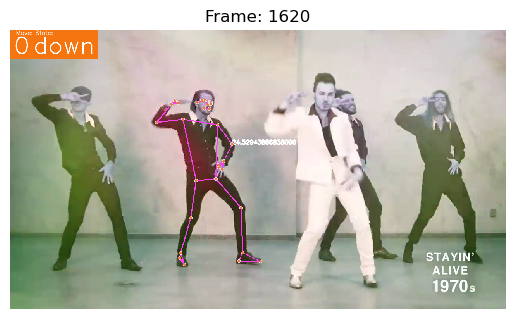

Save Path: /sise/home/edoli/PycharmProjects/Video-Motion-Detector/datasets/videos/video1/frames/left_arm_up/1620.png


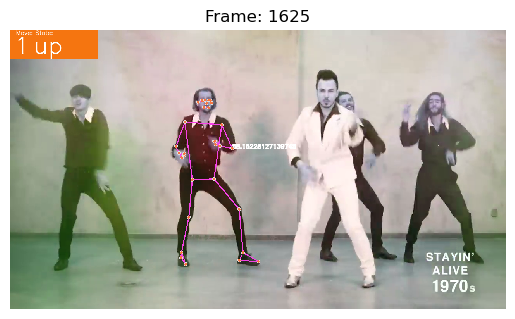

Save Path: /sise/home/edoli/PycharmProjects/Video-Motion-Detector/datasets/videos/video1/frames/left_arm_up/1625.png


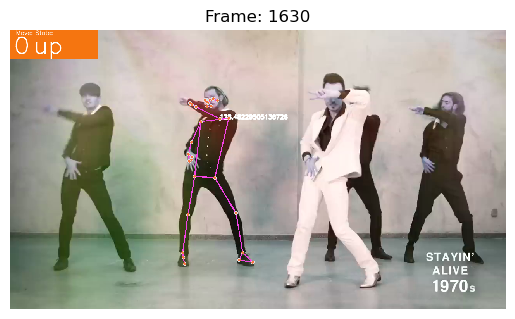

Save Path: /sise/home/edoli/PycharmProjects/Video-Motion-Detector/datasets/videos/video1/frames/left_arm_up/1630.png


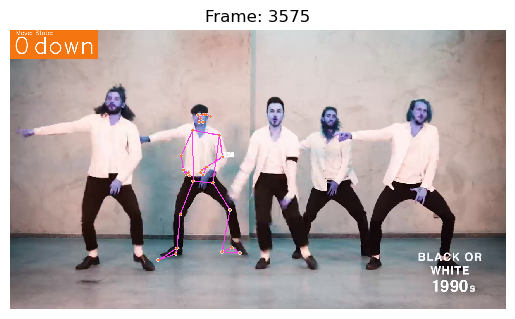

Save Path: /sise/home/edoli/PycharmProjects/Video-Motion-Detector/datasets/videos/video1/frames/jump/3575.png


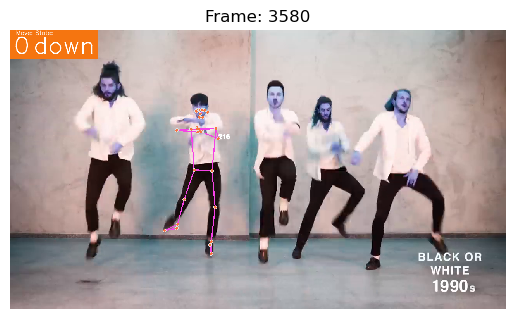

Save Path: /sise/home/edoli/PycharmProjects/Video-Motion-Detector/datasets/videos/video1/frames/jump/3580.png


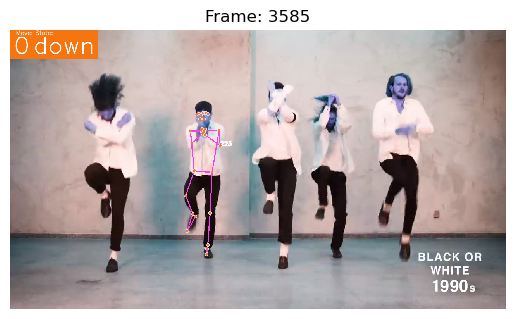

Save Path: /sise/home/edoli/PycharmProjects/Video-Motion-Detector/datasets/videos/video1/frames/jump/3585.png


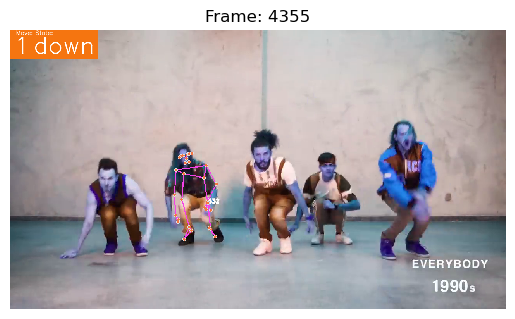

Save Path: /sise/home/edoli/PycharmProjects/Video-Motion-Detector/datasets/videos/video1/frames/duck/4355.png


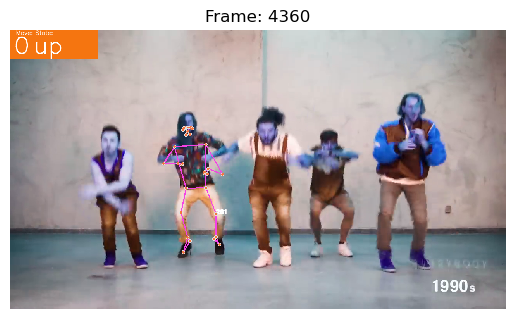

Save Path: /sise/home/edoli/PycharmProjects/Video-Motion-Detector/datasets/videos/video1/frames/duck/4360.png


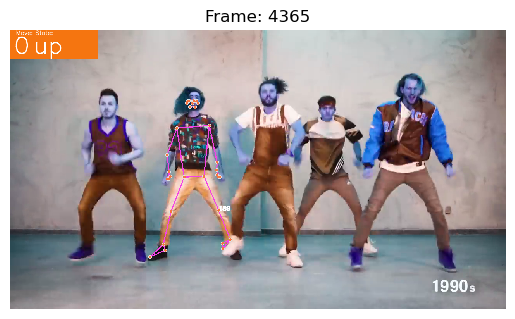

Save Path: /sise/home/edoli/PycharmProjects/Video-Motion-Detector/datasets/videos/video1/frames/duck/4365.png


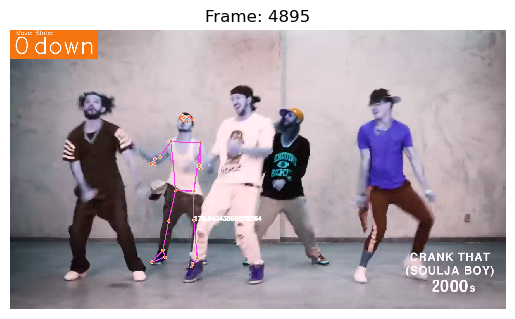

Save Path: /sise/home/edoli/PycharmProjects/Video-Motion-Detector/datasets/videos/video1/frames/left_leg_up/4895.png


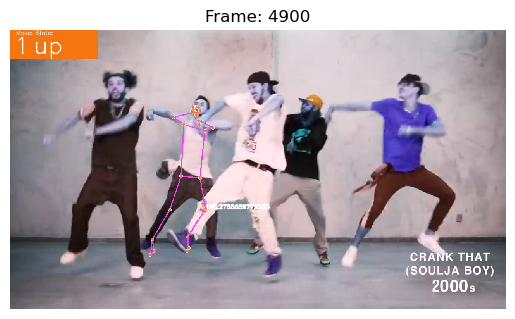

Save Path: /sise/home/edoli/PycharmProjects/Video-Motion-Detector/datasets/videos/video1/frames/left_leg_up/4900.png


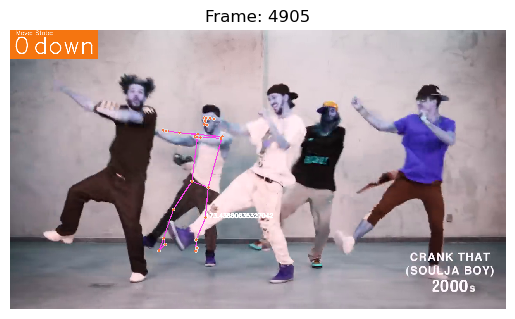

Save Path: /sise/home/edoli/PycharmProjects/Video-Motion-Detector/datasets/videos/video1/frames/left_leg_up/4905.png
Done detecting features.


<Figure size 640x480 with 0 Axes>

In [22]:
# Runs Motion Feature Detector Model

d_frame_features_moves = {'left_arm_up': [1620, 1630], 'jump': [3575, 3585], 'duck': [4355, 4365], 'left_leg_up': [4895, 4905]}
curr_video1 = cv2.VideoCapture(p_video1)
s_video0 = 'video0'
motion_dector_features(curr_video1, p_data1, p_frames1, d_frame_features_moves, s_video0, cv2)

In [23]:
def export_video(p_input, p_output, s_video_name, cv2):
    """
    function creates movie comprised of preprocessed frames and outputs to a MP4 file format
    :param p_input: path to input directory
    :param p_output: path to output directory
    :param s_video_name: video title
    :param cv2: current cv2
    """
    p_output_video_mp4 = p_output + s_video_name + '.mp4'
    p_output_video_avi = p_output + s_video_name + '.avi'

    if not os.path.exists(p_output_video_mp4):
        l_frames = os.listdir(p_input)
        files_size = len(l_frames)
        width, height = 1280, 720
        print(f'Number of processed frames: {files_size-1}')
        curr_video = cv2.VideoWriter(p_output_video_avi, cv2.VideoWriter_fourcc(*'XVID'), 30, (width, height))
        
        for curr_frame in l_frames:
            p_read = os.path.join(p_input, curr_frame)
            curr_video.write(cv2.imread(p_read))
    
        cv2.destroyAllWindows()
        curr_video.release()
    
        !ffmpeg -i $p_output_video_avi -c:v libx264 $p_output_video_mp4

        !rm $p_output_video_avi

In [24]:
# Exports: Frames -> Video

for s_curr_feature in d_frame_features_moves.keys():
    p_input_feature = p_frames1 + s_curr_feature + '/'
    export_video(p_input_feature, p_frames1, s_curr_feature, cv2)

In [25]:
def show_video(p_output_video_mp4, i_replay):
    """
    function displays preprocessed video
    :param p_output_video_mp4: path to video file
    :param i_replay: replay count
    """
    curr_file_video = open(p_output_video_mp4, 'rb').read()
    coding = 'data:video/mp4;base64,' + b64encode(curr_file_video).decode()
    return coding

## Movement Feauture Examples:

### (1.1) Left Arm Up

In [27]:
feature_arm = 'left_arm_up'
p_video_arm = f'{p_frames1}{feature_arm}.mp4'
Video(p_video_arm, embed=True)

### (1.2) Left Leg Up

In [28]:
feature_leg = 'left_leg_up'
p_video_leg = f'{p_frames1}{feature_leg}.mp4'
Video(p_video_leg, embed=True)

### (1.3) Jump

In [30]:
feature_jump = 'jump'
p_video_jump = f'{p_frames1}{feature_jump}.mp4'
Video(p_video_jump, embed=True)

### (1.4) Duck

In [32]:
feature_duck = 'duck'
p_video_duck = f'{p_frames1}{feature_duck}.mp4'
Video(p_video_duck, embed=True)

## Movement Detection Model

In [34]:
def motion_detector_mp(curr_video, p_data, p_frames, d_frame_windows, s_video, cv2):
    """
    Main functions runs: Video Motion Detector Model
    Generation of multivariate timeseries movement datasets:
    (1) Aggregated Distances
    (2) Delta Distances
    (3) Unique and Frequent Moves
    (4) Movement States
    (5) Pose Landmark Coordinates
    Notes: left gesture = located right in image
    :param curr_video: current video
    :param p_data: path to data directory
    :param p_frames: path to frame directory
    :param d_frame_windows: window sizes of frames
    :param s_video: current video title
    :return: timeseries of video movement recognition datasets
    """
    mp_drawing = mp.solutions.drawing_utils
    mp_pose = mp.solutions.pose
    m_pose = mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5)

    i_frame_total = 0  # global videos index frame (all)
    sum_frames_total = 0  # global videos sum frames (analyzed)
    i_entity = 1 # global timeseries entity index (analyzed)
    d_logs = defaultdict(str)  # logs of frames with errors

    i_frames = int(curr_video.get(cv2.CAP_PROP_FRAME_COUNT))
    print(f'Number of frames for current video: {i_frames}')

    l_cols_embed_delta = ['frame_timestamp_global', 'frame_timestamp_local', 'i_video', 'i_entity', 'label',
                          'delta_all_body', 'delta_head', 'delta_upper_body', 'delta_lower_body',
                          'delta_arms', 'delta_legs',
                          'delta_left_arm', 'delta_right_arm', 'delta_left_leg', 'delta_right_leg',
                          'delta_left_shoulder', 'delta_right_shoulder', 'delta_left_elbow', 'delta_right_elbow',
                          'delta_left_wrist', 'delta_right_wrist',
                          'delta_left_hip', 'delta_right_hip', 'delta_left_knee', 'delta_right_knee',
                          'delta_left_ankle', 'delta_right_ankle'
                          ]
    df_embed_delta = pd.DataFrame(columns=l_cols_embed_delta)

    l_cols_embed_distance = ['frame_timestamp_global', 'frame_timestamp_local', 'i_video', 'i_entity', 'label',
                             'distance_all_body', 'distance_head', 'distance_upper_body', 'distance_lower_body',
                             'distance_arms', 'distance_legs',
                             'distance_left_arm', 'distance_right_arm', 'distance_left_leg', 'distance_right_leg'
                             ]
    df_embed_distance = pd.DataFrame(columns=l_cols_embed_distance)

    l_cols_embed_coordinates = ['frame_timestamp_global', 'frame_timestamp_local', 'i_video','i_entity',  'label',
                                'left_arm_x', 'left_arm_y', 'right_arm_x', 'right_arm_y',
                                'left_leg_x', 'left_leg_y', 'right_leg_x', 'right_leg_y',
                                'head_x', 'head_y'
                                ]
    df_embed_coordinates = pd.DataFrame(columns=l_cols_embed_coordinates)

    l_cols_embed_moves = ['frame_timestamp_global', 'frame_timestamp_local', 'i_video', 'i_entity', 'label',
                          'left_arm_up', 'left_arm_down', 'left_leg_up', 'left_leg_down',
                          'right_arm_up', 'right_arm_down', 'right_leg_up', 'right_leg_down',
                          'jump', 'duck'
                          ]

    df_embed_moves = pd.DataFrame(columns=l_cols_embed_moves)

    l_cols_embed_states = ['frame_timestamp_global', 'frame_timestamp_local', 'i_video', 'i_entity', 'label',
                           'state_left_arm_up', 'state_left_arm_down', 'state_left_leg_up', 'state_left_leg_down',
                           'state_right_arm_up', 'state_right_arm_down', 'state_right_leg_up', 'state_right_leg_down',
                           'state_jump', 'state_duck'
                           ]
    df_embed_states = pd.DataFrame(columns=l_cols_embed_states)

    thresh_arm_up, thresh_arm_up_side = 25, 180
    thresh_leg_up, thresh_leg_up_side = 160, 165
    thresh_jump, thresh_duck = 160, 330

    # frame_height, frame_width = frame.shape[0], frame.shape[1]  # <height=720, width=1280>
    # print(f'Frame Height: {frame_height}, Frame Width: {frame_width}')
    frame_height, frame_width = 720, 1280

    l_windows_modulo = [1, 3, 5, 10]  # window sizes for each video: skips every X frames
    # i_modulo_video_frames = 1
    # i_modulo_video_frames = 3
    i_modulo_video_frames = 5
    # i_modulo_video_frames = 10

    s_model = f'{i_modulo_video_frames}Skip'

    for i, (curr_decade, d_videos) in enumerate(d_frame_windows.items()):  # loops decades
        sum_frames_decade = 0  # decades sum frames analyzed
        size_decade_videos = len(d_frame_windows[curr_decade])  # size of decade videos

        for j, (curr_title, l_curr_timestamps) in enumerate(d_videos.items()):  # loops dance videos (per decade)
            print(f'Dance Decade: {curr_decade}, Dance Title: {curr_title}, Dance Number: {j + 1}')
            i_frame_video = 0  # local index video frame (analyzed)
            sum_frames_video = 0  # videos in decade sum frames (analyzed)
            curr_video_timeframe_start, curr_video_timeframe_end = l_curr_timestamps[0], l_curr_timestamps[1]

            prev_left_shoulder, prev_right_shoulder, prev_left_elbow, prev_right_elbow, prev_left_wrist, prev_right_wrist = None, None, None, None, None, None
            prev_left_hip, prev_right_hip, prev_left_knee, prev_right_knee, prev_left_ankle, prev_right_ankle = None, None, None, None, None, None
            prev_left_arm, prev_right_arm, prev_left_leg, prev_right_leg = None, None, None, None
            prev_arms, prev_legs = None, None
            prev_head, prev_upper_body, prev_lower_body, prev_all_body = None, None, None, None

            distance_left_arm, distance_right_arm, distance_left_leg, distance_right_leg = 0, 0, 0, 0
            distance_arms, distance_legs = 0, 0
            distance_head, distance_upper_body, distance_lower_body, distance_all_body = 0, 0, 0, 0

            state_arm_left_up, state_arm_right_up = None, None
            state_arm_left_down, state_arm_right_down = None, None
            state_leg_left_up, state_leg_right_up = None, None
            state_leg_left_down, state_leg_right_down = None, None
            state_jump, state_duck = None, None

            while i_frame_total < curr_video_timeframe_start:  # sets first frame index video
                success, frame = curr_video.read()
                i_frame_total += 1
                if not success:
                    d_logs[i_frame_total] = 'NA'
                    print(f'Frame Error: {i_frame_total}, Ignoring empty camera frame.')

            pbar = tqdm(desc=f'Video Loop: {j+1}')
            while curr_video_timeframe_start <= i_frame_total <= curr_video_timeframe_end:
                if i_frame_total <= curr_video_timeframe_end <= i_frames:  # constraint frames range - all
                    if i_frame_total % i_modulo_video_frames == 0:  # constraint frames windows sizes - analyzed
                        count_arm_left_up, count_arm_right_up, count_arm_left_down, count_arm_right_down = 0, 0, 0, 0
                        count_leg_left_up, count_leg_right_up, count_leg_left_down, count_leg_right_down = 0, 0, 0, 0
                        count_jump, count_duck = 0, 0

                        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)  # to RGB

                        results = m_pose.process(frame)

                        frame = cv2.cvtColor(frame, cv2.COLOR_RGB2BGR)  # to BGR

                        if results.pose_landmarks:
                            mp_drawing.draw_landmarks(frame, results.pose_landmarks, mp_pose.POSE_CONNECTIONS)
                            landmarks = results.pose_landmarks.landmark

                            # movement recognition:
                            left_wrist, right_wrist = landmarks[mp_pose.PoseLandmark.LEFT_WRIST], landmarks[mp_pose.PoseLandmark.RIGHT_WRIST]
                            left_elbow, right_elbow = landmarks[mp_pose.PoseLandmark.LEFT_ELBOW], landmarks[mp_pose.PoseLandmark.RIGHT_ELBOW]
                            left_shoulder, right_shoulder = landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER], landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER]
                            left_leg_index, right_leg_index = landmarks[mp_pose.PoseLandmark.LEFT_FOOT_INDEX], landmarks[mp_pose.PoseLandmark.RIGHT_FOOT_INDEX]
                            left_ankle, right_ankle = landmarks[mp_pose.PoseLandmark.LEFT_ANKLE], landmarks[mp_pose.PoseLandmark.RIGHT_ANKLE]
                            left_knee, right_knee = landmarks[mp_pose.PoseLandmark.LEFT_KNEE], landmarks[mp_pose.PoseLandmark.RIGHT_KNEE]
                            left_hip, right_hip = landmarks[mp_pose.PoseLandmark.LEFT_HIP], landmarks[mp_pose.PoseLandmark.RIGHT_HIP]
                            head = landmarks[mp_pose.PoseLandmark.NOSE]

                            # features:
                            # (1) calculates motions deltas (differences)
                            delta_left_shoulder, delta_right_shoulder = calculate_distance(left_shoulder, prev_left_shoulder), calculate_distance(right_shoulder, prev_right_shoulder)
                            delta_left_elbow, delta_right_elbow = calculate_distance(left_elbow, prev_left_elbow), calculate_distance(right_elbow, prev_right_elbow)
                            delta_left_wrist, delta_right_wrist = calculate_distance(left_wrist, prev_left_wrist), calculate_distance(right_wrist, prev_right_wrist)
                            delta_left_hip, delta_right_hip = calculate_distance(left_hip, prev_left_hip), calculate_distance(right_hip, prev_right_hip)
                            delta_left_knee, delta_right_knee = calculate_distance(left_knee, prev_left_knee), calculate_distance(right_knee, prev_right_knee)
                            delta_left_ankle, delta_right_ankle = calculate_distance(left_ankle, prev_left_ankle), calculate_distance(right_ankle, prev_right_ankle)

                            left_arm = delta_left_shoulder + delta_left_elbow + delta_left_wrist
                            delta_left_arm = calculate_distance(left_arm, prev_left_arm)
                            right_arm = delta_right_shoulder + delta_right_elbow + delta_right_wrist
                            delta_right_arm = calculate_distance(right_arm, prev_right_arm)

                            left_leg = delta_left_hip + delta_left_knee + delta_left_ankle
                            delta_left_leg = calculate_distance(left_leg, prev_left_leg)
                            right_leg = delta_right_hip + delta_right_knee + delta_right_ankle
                            delta_right_leg = calculate_distance(right_leg, prev_right_leg)

                            arms = delta_left_arm + delta_right_arm
                            delta_arms = calculate_distance(arms, prev_arms)
                            legs = delta_left_leg + delta_right_leg
                            delta_legs = calculate_distance(legs, prev_legs)

                            delta_head = calculate_distance(head, prev_head)
                            upper_body = delta_left_arm + delta_right_arm
                            delta_upper_body = calculate_distance(upper_body, prev_upper_body)
                            lower_body = delta_left_leg + delta_right_leg
                            delta_lower_body = calculate_distance(lower_body, prev_lower_body)
                            all_body = delta_head + delta_upper_body + delta_lower_body
                            delta_all_body = calculate_distance(all_body, prev_all_body)

                            # updates: previous movement recognition
                            prev_left_shoulder, prev_right_shoulder = left_shoulder, right_shoulder
                            prev_left_elbow, prev_right_elbow = left_elbow, right_elbow
                            prev_left_wrist, prev_right_wrist = left_wrist, right_wrist
                            # print(f'Delta Left Shoulder: {delta_left_shoulder}, Delta Right Shoulder: {delta_right_shoulder}, Delta Left Elbow: {delta_left_elbow}, Delta Right Elbow: {delta_right_elbow}, Delta Left Wrist: {delta_left_wrist}, Delta Right Wrist: {delta_right_wrist}')
                            prev_left_hip, prev_right_hip = left_hip, right_hip
                            prev_left_knee, prev_right_knee = left_knee, right_knee
                            prev_left_ankle, prev_right_ankle = left_ankle, right_ankle
                            # print(f'Delta Left Hip: {delta_left_hip}, Delta Right Hip: {delta_right_hip}, Delta Left Knee: {delta_left_knee}, Delta Right Knee: {delta_right_knee}, Delta Left Ankle: {delta_left_ankle}, Delta Right Ankle: {delta_right_ankle}')
                            prev_left_arm, prev_right_arm = left_arm, right_arm
                            prev_left_leg, prev_right_leg = left_leg, right_leg
                            # print(f'Delta Left Arm: {delta_left_arm}, Delta Right Arm: {delta_right_arm}, Delta Left Leg: {delta_left_leg}, Delta Right Leg: {delta_right_leg}')
                            prev_arms, prev_legs = arms, legs
                            # print(f'Delta Arms (Both): {delta_arms}, Delta Legs (Both): {delta_legs}')
                            prev_head, prev_upper_body, prev_lower_body, prev_all_body = head, upper_body, lower_body, all_body
                            # print(f'Delta Head: {delta_head}, Delta Upper Body: {delta_upper_body}, Delta Lower Body: {delta_lower_body}, Delta All Body Movement: {delta_all_body}')

                            # (2) calculates motions distances (absolute - from aggregated deltas)
                            distance_left_arm = np.abs(distance_left_arm + delta_left_arm)
                            distance_right_arm = np.abs(distance_right_arm + delta_right_arm)
                            distance_left_leg = np.abs(distance_left_leg + delta_left_leg)
                            distance_right_leg = np.abs(distance_right_leg + delta_right_leg)
                            distance_arms = np.abs(distance_arms + delta_arms)
                            distance_legs = np.abs(distance_legs + delta_legs)
                            distance_head = np.abs(distance_head + delta_head)
                            distance_upper_body = np.abs(distance_upper_body + delta_upper_body)
                            distance_lower_body = np.abs(distance_lower_body + delta_lower_body)
                            distance_all_body = np.abs(distance_all_body + delta_all_body)

                            # (3) calculates motions unique moves
                            left_shoulder_loc, right_shoulder_loc = [left_shoulder.x, left_shoulder.y], [right_shoulder.x, right_shoulder.y]
                            left_elbow_loc, right_elbow_loc = [left_elbow.x, left_elbow.y], [right_elbow.x, right_elbow.y]
                            left_wrist_loc, right_wrist_loc = [left_wrist.x, left_wrist.y], [right_wrist.x, right_wrist.y]
                            left_hip_loc, right_hip_loc = [left_hip.x, left_hip.y], [right_hip.x, right_hip.y]
                            left_knee_loc, right_knee_loc = [left_knee.x, left_knee.y], [right_knee.x, right_knee.y]
                            left_ankle_loc, right_ankle_loc = [left_ankle.x, left_ankle.y], [right_ankle.x, right_ankle.y]
                            left_leg_index_loc, right_leg_index_loc = [left_leg_index.x, left_leg_index.y], [right_leg_index.x, right_leg_index.y]

                            # locations (frame)
                            frame_left_wrist_x, frame_left_wrist_y = tuple(np.multiply([left_wrist.x, left_wrist.y], [frame_width, frame_height]).astype(int))  # <width, height>
                            frame_right_wrist_x, frame_right_wrist_y = tuple(np.multiply([right_wrist.x, right_wrist.y], [frame_width, frame_height]).astype(int))
                            frame_left_elbow_x, frame_left_elbow_y = tuple(np.multiply([left_elbow.x, left_elbow.y], [frame_width, frame_height]).astype(int))
                            frame_right_elbow_x, frame_right_elbow_y = tuple(np.multiply([right_elbow.x, right_elbow.y], [frame_width, frame_height]).astype(int))
                            frame_head_x, frame_head_y = tuple(np.multiply([head.x, head.y], [frame_width, frame_height]).astype(int))

                            # (3.1 + 3.2) left hand up and down
                            if left_wrist.y >= left_elbow.y:  # case: left hand facing left (frame y axes values are ordered opposite)
                                angle_arm_left = calculate_angle(left_hip_loc, left_shoulder_loc, left_elbow_loc)
                                count_arm_left_up, state_arm_left_up = set_unique_move(angle_arm_left, state_arm_left_up, thresh_arm_up, count_arm_left_up, 'arm', 'up', i_frame_total)
                                count_arm_left_down, state_arm_left_down = set_unique_move(angle_arm_left, state_arm_left_down, thresh_arm_up, count_arm_left_down, 'arm', 'down', i_frame_total)
                            else:  # case: left hand facing right
                                angle_arm_left = calculate_angle(left_shoulder_loc, left_elbow_loc, left_wrist_loc)
                                count_arm_left_up, state_arm_left_up = set_unique_move(angle_arm_left, state_arm_left_up, thresh_arm_up_side, count_arm_left_up, 'arm_side', 'up', i_frame_total)
                                count_arm_left_down, state_arm_left_down = set_unique_move(angle_arm_left, state_arm_left_down, thresh_arm_up_side, count_arm_left_down, 'arm_side', 'down', i_frame_total)

                            # (3.3 + 3.4) right hand up and down
                            if right_wrist.y >= right_elbow.y:
                                angle_arm_right = calculate_angle(right_hip_loc, right_shoulder_loc, right_elbow_loc)
                                count_arm_right_up, state_arm_right_up = set_unique_move(angle_arm_right, state_arm_right_up, thresh_arm_up, count_arm_right_up, 'arm', 'up', i_frame_total)
                                count_arm_right_down, state_arm_right_down = set_unique_move(angle_arm_right, state_arm_right_down, thresh_arm_up, count_arm_right_down, 'arm', 'down', i_frame_total)
                            else:
                                angle_arm_right = calculate_angle(right_shoulder_loc, right_elbow_loc, right_wrist_loc)
                                count_arm_right_up, state_arm_right_up = set_unique_move(angle_arm_right, state_arm_right_up, thresh_arm_up_side, count_arm_right_up, 'arm_side', 'up', i_frame_total)
                                count_arm_right_down, state_arm_right_down = set_unique_move(angle_arm_right, state_arm_right_down, thresh_arm_up_side, count_arm_right_down, 'arm_side', 'down', i_frame_total)

                            # (3.5 + 3.6) left leg up and down
                            if left_knee.x < left_leg_index.x:  # case: left leg facing left (right in the image)
                                angle_leg_left = calculate_angle(left_shoulder_loc, left_hip_loc, left_leg_index_loc)
                                count_leg_left_up, state_leg_left_up = set_unique_move(angle_leg_left, state_leg_left_up, thresh_leg_up, count_leg_left_up, 'leg', 'up', i_frame_total)
                                count_leg_left_down, state_leg_left_down = set_unique_move(angle_leg_left, state_leg_left_down, thresh_leg_up, count_leg_left_down, 'leg', 'down', i_frame_total)
                            else:  # case: left leg facing right (left in the image)
                                angle_leg_left = calculate_angle(left_hip_loc, left_knee_loc, left_leg_index_loc)
                                count_leg_left_up, state_leg_left_up = set_unique_move(angle_leg_left, state_leg_left_up, thresh_leg_up_side, count_leg_left_up, 'leg_side', 'up', i_frame_total)
                                count_leg_left_down, state_leg_left_down = set_unique_move(angle_leg_left, state_leg_left_down, thresh_leg_up_side, count_leg_left_down, 'leg_side', 'down', i_frame_total)

                            # (3.7 + 3.8) right leg up and down
                            if right_knee.x < right_leg_index.x:
                                angle_leg_right = calculate_angle(right_shoulder_loc, right_hip_loc, right_leg_index_loc)
                                count_leg_right_up, state_leg_right_up = set_unique_move(angle_leg_right, state_leg_right_up, thresh_leg_up, count_leg_right_up, 'leg', 'up', i_frame_total)
                                count_leg_right_down, state_leg_right_down = set_unique_move(angle_leg_right, state_leg_right_down, thresh_leg_up, count_leg_right_down, 'leg', 'down', i_frame_total)
                            else:
                                angle_leg_right = calculate_angle(right_hip_loc, right_knee_loc, right_leg_index_loc)
                                count_leg_right_up, state_leg_right_up = set_unique_move(angle_leg_right, state_leg_right_up, thresh_leg_up_side, count_leg_right_up, 'leg_side', 'up', i_frame_total)
                                count_leg_right_down, state_leg_right_down = set_unique_move(angle_leg_right, state_leg_right_down, thresh_leg_up_side, count_leg_right_down, 'leg_side', 'down', i_frame_total)

                            # (3.9) jump
                            count_jump, state_jump = set_unique_move(frame_head_y, state_jump, thresh_jump, count_jump, 'jump', 'up', i_frame_total)

                            # (3.10) duck
                            count_duck, state_duck = set_unique_move(frame_head_y, state_duck, thresh_duck, count_duck, 'duck', 'down', i_frame_total)

                            # updates: timeseries variables
                            l_embed_delta = [i_frame_total, i_frame_video, j+1, i_entity, curr_decade,
                                             delta_all_body, delta_head, delta_upper_body, delta_lower_body,
                                             delta_arms, delta_legs,
                                             delta_left_arm, delta_right_arm, delta_left_leg, delta_right_leg,
                                             delta_left_shoulder, delta_right_shoulder, delta_left_elbow,
                                             delta_right_elbow, delta_left_wrist, delta_right_wrist,
                                             delta_left_hip, delta_right_hip, delta_left_knee, delta_right_knee,
                                             delta_left_ankle, delta_right_ankle
                                             ]
                            df_curr_embed_delta = pd.Series(l_embed_delta, index=l_cols_embed_delta).to_frame().T
                            df_embed_delta = pd.concat([df_embed_delta, df_curr_embed_delta], axis=0)

                            l_embed_coordinates = [i_frame_total, i_frame_video, j+1, i_entity, curr_decade,
                                                   left_wrist.x, left_wrist.y, right_wrist.x, right_wrist.y,
                                                   left_ankle.x, left_ankle.y, right_ankle.x, right_ankle.y,
                                                   head.x, head.y
                                                   ]
                            df_curr_embed_coordinates = pd.Series(l_embed_coordinates, index=l_cols_embed_coordinates).to_frame().T
                            df_embed_coordinates = pd.concat([df_embed_coordinates, df_curr_embed_coordinates], axis=0)

                            l_embed_moves = [i_frame_total, i_frame_video, j+1, i_entity, curr_decade,
                                             count_arm_left_up, count_arm_left_down, count_leg_left_up, count_leg_left_down,
                                             count_arm_right_up, count_arm_right_down, count_leg_right_up, count_leg_right_down,
                                             count_jump, count_duck
                                             ]
                            df_curr_embed_moves = pd.Series(l_embed_moves, index=l_cols_embed_moves).to_frame().T
                            df_embed_moves = pd.concat([df_embed_moves, df_curr_embed_moves], axis=0)

                            l_embed_states = [i_frame_total, i_frame_video, j+1, i_entity, curr_decade,
                                              state_arm_left_up, state_arm_left_down, state_leg_left_up, state_leg_left_down,
                                              state_arm_right_up, state_arm_right_down, state_leg_right_up, state_leg_right_down,
                                              state_jump, state_duck
                                              ]
                            df_curr_embed_states = pd.Series(l_embed_states, index=l_cols_embed_states).to_frame().T
                            df_embed_states = pd.concat([df_embed_states, df_curr_embed_states], axis=0)
                            # plot_frame(frame, i_frame_total, cv2)
                        # last line - analyzed video frames
                        sum_frames_video += 1  # end of while - preprocessed current video
                        sum_frames_decade += 1
                        sum_frames_total += 1
                        i_frame_video += 1
                    # last line - all video frames (in while)
                # last line - video (in while)
                pbar.update(1)
                success, frame = curr_video.read()
                i_frame_total += 1
                while not success:
                    d_logs[i_frame_total] = 'NA'
                    print(f'Frame Error: {i_frame_total}, Ignoring empty camera frame.')
                    success, frame = curr_video.read()
                    i_frame_total += 1
            # last line - end video (in current decade - end while)
            pbar.close()
            l_embed_distance = [-1, sum_frames_video, j+1, -1, curr_decade,
                                distance_all_body, distance_head, distance_upper_body, distance_lower_body,
                                distance_arms, distance_legs,
                                distance_left_arm, distance_right_arm, distance_left_leg, distance_right_leg
                                ]
            df_curr_embed_distance = pd.Series(l_embed_distance, index=l_cols_embed_distance).to_frame().T
            df_embed_distance = pd.concat([df_embed_distance, df_curr_embed_distance], axis=0)

            df_curr_video_moves = df_embed_moves[(df_embed_moves['label'] == curr_decade) & (df_embed_moves['i_video'] == j+1)]
            l_embed_moves = [-1, sum_frames_video, -1, -1, curr_decade,
                             df_curr_video_moves['left_arm_up'].sum(), df_curr_video_moves['left_arm_down'].sum(),
                             df_curr_video_moves['left_leg_up'].sum(), df_curr_video_moves['left_leg_down'].sum(),
                             df_curr_video_moves['right_arm_up'].sum(), df_curr_video_moves['right_arm_down'].sum(),
                             df_curr_video_moves['right_leg_up'].sum(), df_curr_video_moves['right_leg_down'].sum(),
                             df_curr_video_moves['jump'].sum(), df_curr_video_moves['duck'].sum()
                             ]
            df_curr_embed_moves = pd.Series(l_embed_moves, index=l_cols_embed_moves).to_frame().T
            df_embed_moves = pd.concat([df_embed_moves, df_curr_embed_moves], axis=0)
            i_entity += 1
        # last line - end current decade videos
        df_curr_decade_distance = df_embed_distance[df_embed_distance['label'] == curr_decade]
        l_embed_distance = [-1, sum_frames_decade, -2, -2, curr_decade,
                            round(df_curr_decade_distance['distance_all_body'].sum() / size_decade_videos, 3),
                            round(df_curr_decade_distance['distance_head'].sum() / size_decade_videos, 3),
                            round(df_curr_decade_distance['distance_upper_body'].sum() / size_decade_videos, 3),
                            round(df_curr_decade_distance['distance_lower_body'].sum() / size_decade_videos, 3),
                            round(df_curr_decade_distance['distance_arms'].sum() / size_decade_videos, 3),
                            round(df_curr_decade_distance['distance_legs'].sum() / size_decade_videos, 3),
                            round(df_curr_decade_distance['distance_left_arm'].sum() / size_decade_videos, 3),
                            round(df_curr_decade_distance['distance_right_arm'].sum() / size_decade_videos, 3),
                            round(df_curr_decade_distance['distance_left_leg'].sum() / size_decade_videos, 3),
                            round(df_curr_decade_distance['distance_right_leg'].sum() / size_decade_videos, 3)
                            ]
        df_curr_embed_distance = pd.Series(l_embed_distance, index=l_cols_embed_distance).to_frame().T
        df_embed_distance = pd.concat([df_embed_distance, df_curr_embed_distance], axis=0)

        df_curr_decade_moves = df_embed_moves[df_embed_moves['label'] == curr_decade]
        l_embed_moves = [-1, sum_frames_decade, -2, -2, curr_decade,
                         round(df_curr_decade_moves['left_arm_up'].sum() / size_decade_videos, 3),
                         round(df_curr_decade_moves['left_arm_down'].sum() / size_decade_videos, 3),
                         round(df_curr_decade_moves['left_leg_up'].sum() / size_decade_videos, 3),
                         round(df_curr_decade_moves['left_leg_down'].sum() / size_decade_videos, 3),
                         round(df_curr_decade_moves['right_arm_up'].sum() / size_decade_videos, 3),
                         round(df_curr_decade_moves['right_arm_down'].sum() / size_decade_videos, 3),
                         round(df_curr_decade_moves['right_leg_up'].sum() / size_decade_videos, 3),
                         round(df_curr_decade_moves['right_leg_down'].sum() / size_decade_videos, 3),
                         round(df_curr_decade_moves['jump'].sum() / size_decade_videos, 3),
                         round(df_curr_decade_moves['duck'].sum() / size_decade_videos, 3)
                         ]
        df_curr_embed_moves = pd.Series(l_embed_moves, index=l_cols_embed_moves).to_frame().T
        df_embed_moves = pd.concat([df_embed_moves, df_curr_embed_moves], axis=0)

        print(f'Dance Decade: {curr_decade}, Decade Total Analyzed Frames: {sum_frames_decade}')

    # last line - all decades
    print(f'Done. Total number of frames analyzed: {sum_frames_total}')

    df_logs = pd.DataFrame.from_dict(d_logs, orient='index')
    df_logs.to_csv(p_data + 'df_logs' + '_' + s_video + '.csv', index=False, header=True, na_rep='NA')

    df_embed_delta = set_format(df_embed_delta, l_features_deltas, float)
    df_embed_distance = set_format(df_embed_distance, l_features_distances, float)

    df_embed_delta.to_csv(p_data + 'df_embed_delta' + '_' + s_video + '.csv', index=False, header=True, na_rep='NA')
    df_embed_distance.to_csv(p_data + 'df_embed_distance' + '_' + s_video + '.csv', index=False, header=True, na_rep='NA')
    df_embed_coordinates.to_csv(p_data + 'df_embed_coordinates' + '_' + s_video + '.csv', index=False, header=True, na_rep='NA')
    df_embed_moves.to_csv(p_data + 'df_embed_moves' + '_' + s_video + '.csv', index=False, header=True, na_rep='NA')
    df_embed_states.to_csv(p_data + 'df_embed_states' + '_' + s_video + '.csv', index=False, header=True, na_rep='NA')

    curr_video.release()
    cv2.destroyAllWindows()
    return df_embed_delta, df_embed_distance, df_embed_coordinates, df_embed_moves, df_embed_states

In [35]:
# Runs Video Motion Detector Model

curr_video1 = cv2.VideoCapture(p_video1)
s_title_video1 = 'video1'
df_embed_delta1, df_embed_distance1, df_embed_coordinates1, df_embed_moves1, df_embed_states1 = motion_detector_mp(curr_video1, p_data1, p_frames1, d_frame_windows1, s_title_video1, cv2)

I0000 00:00:1716294358.380923 3601593 gl_context_egl.cc:85] Successfully initialized EGL. Major : 1 Minor: 5
I0000 00:00:1716294358.396107 3603242 gl_context.cc:357] GL version: 3.2 (OpenGL ES 3.2 Mesa 23.1.4), renderer: llvmpipe (LLVM 16.0.6, 256 bits)


Number of frames for current video: 8575
Dance Decade: 1950, Dance Title: singing in the rain, Dance Number: 1


Video Loop: 1: 181it [00:01, 115.82it/s]


Dance Decade: 1950, Dance Title: hound dog, Dance Number: 2


Video Loop: 2: 241it [00:02, 116.76it/s]


Dance Decade: 1950, Dance Title: tutti frutti, Dance Number: 3


Video Loop: 3: 121it [00:01, 117.64it/s]


Dance Decade: 1950, Decade Total Analyzed Frames: 111
Dance Decade: 1960, Dance Title: lets twist again, Dance Number: 1


Video Loop: 1: 96it [00:00, 117.29it/s]


Dance Decade: 1960, Dance Title: i feel good, Dance Number: 2


Video Loop: 2: 206it [00:01, 118.77it/s]


Dance Decade: 1960, Dance Title: i want you back, Dance Number: 3


Video Loop: 3: 236it [00:01, 119.91it/s]


Dance Decade: 1960, Decade Total Analyzed Frames: 110
Dance Decade: 1970, Dance Title: stayin alive, Dance Number: 1


Video Loop: 1: 236it [00:02, 117.47it/s]


Dance Decade: 1970, Dance Title: dancing machine, Dance Number: 2


Video Loop: 2: 141it [00:01, 118.12it/s]


Dance Decade: 1970, Dance Title: shake your body, Dance Number: 3


Video Loop: 3: 81it [00:00, 116.89it/s]


Dance Decade: 1970, Dance Title: youre the one that i want, Dance Number: 4


Video Loop: 4: 56it [00:00, 114.32it/s]


Dance Decade: 1970, Decade Total Analyzed Frames: 106
Dance Decade: 1980, Dance Title: time of my life, Dance Number: 1


Video Loop: 1: 111it [00:00, 114.08it/s]


Dance Decade: 1980, Dance Title: billie jean, Dance Number: 2


Video Loop: 2: 326it [00:02, 119.56it/s]


Dance Decade: 1980, Dance Title: rhythm nation, Dance Number: 3


Video Loop: 3: 166it [00:01, 118.83it/s]


Dance Decade: 1980, Dance Title: footloose, Dance Number: 4


Video Loop: 4: 166it [00:01, 118.26it/s]


Dance Decade: 1980, Dance Title: thriller, Dance Number: 5


Video Loop: 5: 206it [00:01, 118.53it/s]


Dance Decade: 1980, Dance Title: what a feeling, Dance Number: 6


Video Loop: 6: 111it [00:00, 114.16it/s]


Dance Decade: 1980, Decade Total Analyzed Frames: 222
Dance Decade: 1990, Dance Title: u cant touch this, Dance Number: 1


Video Loop: 1: 46it [00:00, 105.80it/s]


Dance Decade: 1990, Dance Title: black or white, Dance Number: 2


Video Loop: 2: 176it [00:01, 118.54it/s]


Dance Decade: 1990, Dance Title: vogue, Dance Number: 3


Video Loop: 3: 251it [00:02, 116.80it/s]


Dance Decade: 1990, Dance Title: its not unusual, Dance Number: 4


Video Loop: 4: 171it [00:01, 119.17it/s]


Dance Decade: 1990, Dance Title: everybody, Dance Number: 5


Video Loop: 5: 246it [00:02, 118.60it/s]


Dance Decade: 1990, Dance Title: macarena , Dance Number: 6


Video Loop: 6: 236it [00:02, 117.77it/s]


Dance Decade: 1990, Decade Total Analyzed Frames: 230
Dance Decade: 2000, Dance Title: crank that, Dance Number: 1


Video Loop: 1: 266it [00:02, 116.50it/s]


Dance Decade: 2000, Dance Title: single ladies, Dance Number: 2


Video Loop: 2: 131it [00:01, 117.12it/s]


Dance Decade: 2000, Dance Title: bye bye bye, Dance Number: 3


Video Loop: 3: 281it [00:02, 118.93it/s]


Dance Decade: 2000, Dance Title: ragatanga, Dance Number: 4


Video Loop: 4: 151it [00:01, 116.84it/s]


Dance Decade: 2000, Decade Total Analyzed Frames: 169
Dance Decade: 2010, Dance Title: gangnam style, Dance Number: 1


Video Loop: 1: 211it [00:01, 117.20it/s]


Dance Decade: 2010, Dance Title: despacito, Dance Number: 2


Video Loop: 2: 241it [00:02, 116.58it/s]


Dance Decade: 2010, Dance Title: uptown funk, Dance Number: 3


Video Loop: 3: 216it [00:01, 116.92it/s]


Dance Decade: 2010, Dance Title: party rock anthem, Dance Number: 4


Video Loop: 4: 181it [00:01, 116.65it/s]


Dance Decade: 2010, Dance Title: cant stop the feeling, Dance Number: 5


Video Loop: 5: 161it [00:01, 117.40it/s]


Dance Decade: 2010, Dance Title: watch me, Dance Number: 6


Video Loop: 6: 176it [00:01, 116.88it/s]


Dance Decade: 2010, Dance Title: swish swish, Dance Number: 7


Video Loop: 7: 261it [00:02, 117.80it/s]


Dance Decade: 2010, Dance Title: in my feeling, Dance Number: 8


Video Loop: 8: 301it [00:02, 117.87it/s]


Dance Decade: 2010, Dance Title: old town road, Dance Number: 9


Video Loop: 9: 241it [00:02, 116.87it/s]

Dance Decade: 2010, Decade Total Analyzed Frames: 405
Done. Total number of frames analyzed: 1353


In [36]:
# Runs Video Motion Detector Model

curr_video2 = cv2.VideoCapture(p_video2)
s_title_video2 = 'video2'
df_embed_delta2, df_embed_distance2, df_embed_coordinates2, df_embed_moves2, df_embed_states2 = motion_detector_mp(curr_video2, p_data1, p_frames1, d_frame_windows2, s_title_video2, cv2)

I0000 00:00:1716294419.723953 3601593 gl_context_egl.cc:85] Successfully initialized EGL. Major : 1 Minor: 5
I0000 00:00:1716294419.740075 3603433 gl_context.cc:357] GL version: 3.2 (OpenGL ES 3.2 Mesa 23.1.4), renderer: llvmpipe (LLVM 16.0.6, 256 bits)


Number of frames for current video: 11102
Dance Decade: 1950, Dance Title: jailhouse rock, Dance Number: 1


Video Loop: 1: 251it [00:02, 116.65it/s]


Dance Decade: 1950, Decade Total Analyzed Frames: 51
Dance Decade: 1960, Dance Title: west side story, Dance Number: 1


Video Loop: 1: 111it [00:00, 117.61it/s]


Dance Decade: 1960, Decade Total Analyzed Frames: 23
Dance Decade: 1970, Dance Title: the love you save, Dance Number: 1


Video Loop: 1: 211it [00:01, 119.09it/s]


Dance Decade: 1970, Dance Title: sex machine, Dance Number: 2


Video Loop: 2: 181it [00:01, 116.97it/s]


Dance Decade: 1970, Dance Title: you should be dancing, Dance Number: 3


Video Loop: 3: 161it [00:01, 116.59it/s]


Dance Decade: 1970, Dance Title: ymca, Dance Number: 4


Video Loop: 4: 226it [00:01, 120.26it/s]


Dance Decade: 1970, Dance Title: greased lightning, Dance Number: 5


Video Loop: 5: 246it [00:02, 120.16it/s]


Dance Decade: 1970, Decade Total Analyzed Frames: 209
Dance Decade: 1980, Dance Title: beat it, Dance Number: 1


Video Loop: 1: 396it [00:03, 120.06it/s]


Dance Decade: 1980, Dance Title: maniac, Dance Number: 2


Video Loop: 2: 226it [00:01, 119.33it/s]


Dance Decade: 1980, Dance Title: smooth criminal, Dance Number: 3


Video Loop: 3: 261it [00:02, 117.80it/s]


Dance Decade: 1980, Dance Title: i miss you much, Dance Number: 4


Video Loop: 4: 221it [00:01, 118.54it/s]


Dance Decade: 1980, Decade Total Analyzed Frames: 224
Dance Decade: 1990, Dance Title: ice ice baby, Dance Number: 1


Video Loop: 1: 196it [00:01, 117.38it/s]


Dance Decade: 1990, Dance Title: dangerous, Dance Number: 2


Video Loop: 2: 366it [00:03, 119.07it/s]


Dance Decade: 1990, Dance Title: as long as you love me, Dance Number: 3


Video Loop: 3: 241it [00:02, 119.22it/s]


Dance Decade: 1990, Dance Title: men in black, Dance Number: 4


Video Loop: 4: 231it [00:01, 118.31it/s]


Dance Decade: 1990, Decade Total Analyzed Frames: 210
Dance Decade: 2000, Dance Title: oops i did it again, Dance Number: 1


Video Loop: 1: 186it [00:01, 118.78it/s]


Dance Decade: 2000, Dance Title: drop, Dance Number: 2


Video Loop: 2: 236it [00:02, 116.13it/s]


Dance Decade: 2000, Dance Title: rock your body, Dance Number: 3


Video Loop: 3: 126it [00:01, 117.52it/s]


Dance Decade: 2000, Dance Title: 1 2 step, Dance Number: 4


Video Loop: 4: 241it [00:02, 118.23it/s]


Dance Decade: 2000, Dance Title: yeah, Dance Number: 5


Video Loop: 5: 241it [00:02, 118.51it/s]


Dance Decade: 2000, Dance Title: gimme that, Dance Number: 6


Video Loop: 6: 256it [00:02, 118.19it/s]


Dance Decade: 2000, Dance Title: lose control, Dance Number: 7


Video Loop: 7: 241it [00:02, 118.07it/s]


Dance Decade: 2000, Dance Title: hung up, Dance Number: 8


Video Loop: 8: 166it [00:01, 113.88it/s]


Dance Decade: 2000, Dance Title: get right, Dance Number: 9


Video Loop: 9: 151it [00:01, 115.52it/s]


Dance Decade: 2000, Dance Title: walk it out, Dance Number: 10


Video Loop: 10: 141it [00:01, 112.89it/s]


Dance Decade: 2000, Dance Title: bad romance, Dance Number: 11


Video Loop: 11: 226it [00:01, 122.40it/s]


Dance Decade: 2000, Decade Total Analyzed Frames: 451
Dance Decade: 2010, Dance Title: somebody to love, Dance Number: 1


Video Loop: 1: 181it [00:01, 115.08it/s]


Dance Decade: 2010, Dance Title: teach me how to dougie, Dance Number: 2


Video Loop: 2: 91it [00:00, 115.46it/s]


Dance Decade: 2010, Dance Title: one in a million, Dance Number: 3


Video Loop: 3: 291it [00:02, 118.24it/s]


Dance Decade: 2010, Dance Title: waka waka, Dance Number: 4


Video Loop: 4: 186it [00:01, 117.27it/s]


Dance Decade: 2010, Dance Title: run the world, Dance Number: 5


Video Loop: 5: 241it [00:02, 118.20it/s]


Dance Decade: 2010, Dance Title: harlem shake, Dance Number: 6


Video Loop: 6: 331it [00:02, 117.22it/s]


Dance Decade: 2010, Dance Title: dope, Dance Number: 7


Video Loop: 7: 276it [00:02, 116.36it/s]


Dance Decade: 2010, Dance Title: 24k magic, Dance Number: 8


Video Loop: 8: 296it [00:02, 117.01it/s]

Dance Decade: 2010, Decade Total Analyzed Frames: 385
Done. Total number of frames analyzed: 1553


In [37]:
def merge_by_decade_video(df1, df2, l_labels, p_data1, s_title, l_features):
    """
    function merges timeseries embedded video movement recognition datasets
    by hierarchical timepoints:
    (1) By frames
    (2) By videos
    :param df1: first df
    :param df2: second df
    :param l_labels: label list
    :param p_data1: path to data directory
    :param s_title: current type of dataset
    :param l_features: feature list
    :return: merged dataframes by timeperiod categories
    """
    p_output_df_decade = p_data1 + 'df' + '_embed_decade_' + s_title + '.csv'
    df_decade_merge = pd.DataFrame()
    p_output_df_video = p_data1 + 'df' + '_embed_video_' + s_title + '.csv'
    df_video_merge = pd.DataFrame()
    curr_size = len(l_features)
    i_prefix_features = 5
    l_curr_index = df1.columns.tolist()

    for curr_label in l_labels:
        df1_curr_decade = df1[(df1['label'] == int(curr_label)) & (df1['i_video'] == -2)]  # by decade results
        df2_curr_decade = df2[(df2['label'] == int(curr_label)) & (df2['i_video'] == -2)]
        l_first_row = df1_curr_decade.values.tolist()[0][-curr_size:]
        l_second_row = df2_curr_decade.values.tolist()[0][-curr_size:]
        l_new_row = df1_curr_decade.values.tolist()[0][:i_prefix_features]
        for i in range(len(l_first_row)):
            first_value = l_first_row[i]
            second_value = l_second_row[i]
            mean_value = round((first_value + second_value) / 2, 3)
            l_new_row.append(mean_value)
        df_curr_decade_merge = pd.Series(l_new_row, index=l_curr_index).to_frame().T
        df_decade_merge = pd.concat([df_decade_merge, df_curr_decade_merge], axis=0)

        if 'moves' in s_title:  # by video results
            df1_curr_video = df1[(df1['label'] == int(curr_label)) & (df1['i_video'] == -1)]
            df2_curr_video = df2[(df2['label'] == int(curr_label)) & (df2['i_video'] == -1)]
            df_curr_video_merge = pd.concat([df1_curr_video, df2_curr_video], axis=0)
            df_video_merge = pd.concat([df_video_merge, df_curr_video_merge], axis=0)
        elif 'distance' in s_title:
            df1_curr_video = df1[(df1['label'] == int(curr_label)) & (df1['i_video'] > -1)]
            df2_curr_video = df2[(df2['label'] == int(curr_label)) & (df2['i_video'] > -1)]
            df_curr_video_merge = pd.concat([df1_curr_video, df2_curr_video], axis=0)
            df_curr_video_merge['i_video'] = range(1, len(df_curr_video_merge) + 1)
            df_video_merge = pd.concat([df_video_merge, df_curr_video_merge], axis=0)

    if 'moves' in s_title or 'distance' in s_title:  # write results
        df_decade_merge.reset_index(drop=True, inplace=True)
        df_decade_merge.to_csv(p_output_df_decade, index=False, header=True, na_rep='NA')
        df_video_merge.reset_index(drop=True, inplace=True)
        df_video_merge.to_csv(p_output_df_video, index=False, header=True, na_rep='NA')

    return df_video_merge, df_decade_merge

def merge_by_frame(df1, df2, l_labels, p_data1, s_title):
    """
    function merges timeseries embedded video movement recognition datasets
    by hierarchical timepoint:
    (1) By frames
    :param df1: first df
    :param df2: second df
    :param l_labels: label list
    :param p_data1: path to data directory
    :param s_title: current type of dataset
    :return: merged dataframes by timeperiod categories
    """
    p_output_df_frame = p_data1 + 'df' + '_embed_frame_' + s_title + '.csv'
    df_frame_merge = pd.DataFrame()
    i_entity_count = 1

    for curr_label in l_labels:
        df_curr_frame_merge = None
        df1_curr_frame = df1[(df1['label'] == int(curr_label)) & (df1['i_video'] > -1)]
        df2_curr_frame = df2[(df2['label'] == int(curr_label)) & (df2['i_video'] > -1)]
        i_df1_unique_videos = len(df1_curr_frame[df1_curr_frame['frame_timestamp_local'] == 0])
        i_df1_unique_videos += 1

        for t_video_name1, df_subset_video1 in df1_curr_frame.groupby(['i_video']):
            curr_video_name1 = t_video_name1[0]
            df_subset_video1['i_entity'] = i_entity_count
            df_curr_frame_merge = pd.concat([df_curr_frame_merge, df_subset_video1], axis=0)
            i_entity_count += 1

        for t_video_name2, df_subset_video2 in df2_curr_frame.groupby(['i_video']):
            curr_video_name2 = t_video_name2[0]
            df_subset_video2['i_entity'] = i_entity_count
            df_subset_video2['i_video'] = i_df1_unique_videos
            df_curr_frame_merge = pd.concat([df_curr_frame_merge, df_subset_video2], axis=0)
            i_entity_count += 1
            i_df1_unique_videos += 1

        df_frame_merge = pd.concat([df_frame_merge, df_curr_frame_merge], axis=0)

    df_frame_merge.reset_index(drop=True, inplace=True)
    df_frame_merge.to_csv(p_output_df_frame, index=False, header=True, na_rep='NA')
    return df_frame_merge

In [38]:
# Distances #

p_df_embed_distance1 = p_data1+'df_embed_distance_video1.csv'
if os.path.exists(p_df_embed_distance1):
    df_embed_distance1 = pd.read_csv(p_df_embed_distance1)

p_df_embed_distance2 = p_data1+'df_embed_distance_video2.csv'
if os.path.exists(p_df_embed_distance2):
    df_embed_distance2 = pd.read_csv(p_df_embed_distance2)

p_df_embed_decade_distances = p_data1+'df_embed_decade_distances.csv'
if os.path.exists(p_df_embed_decade_distances):
    df_embed_decade_distances = pd.read_csv(p_df_embed_decade_distances)
else:
    df_embed_video_distances, df_embed_decade_distances = merge_by_decade_video(df_embed_distance1, df_embed_distance2, l_labels_decades, p_data1, 'distances', l_features_distances)

p_df_embed_video_distances = p_data1+'df_embed_video_distances.csv'
if os.path.exists(p_df_embed_video_distances):
    df_embed_video_distances = pd.read_csv(p_df_embed_video_distances)
    
df_embed_decade_distances.head()

frame_timestamp_global  frame_timestamp_local  i_video  i_entity   label  \
0                    -1.0                  111.0     -2.0      -2.0  1950.0   
1                    -1.0                  110.0     -2.0      -2.0  1960.0   
2                    -1.0                  106.0     -2.0      -2.0  1970.0   
3                    -1.0                  222.0     -2.0      -2.0  1980.0   
4                    -1.0                  230.0     -2.0      -2.0  1990.0   

   distance_all_body  distance_head  distance_upper_body  distance_lower_body  \
0              4.599          0.825                1.354                1.272   
1              2.035          0.695                1.185                0.402   
2              1.302          0.485                0.546                0.425   
3              2.155          1.011                0.671                0.674   
4              3.486          1.045                0.867                0.941   

   distance_arms  distance_legs  distance_left_arm  distance_right_arm  \
0          1.354          1.272              0.144               0.223   
1          1.185          0.402              0.104               0.062   
2          0.546          0.425              0.159               0.168   
3          0.671          0.674              0.123               0.114   
4          0.867          0.941              0.114               0.081   

   distance_left_leg  distance_right_leg  
0              0.064               0.045  
1              0.052               0.054  
2              0.077               0.121  
3              0.100               0.079  
4              0.044               0.046

In [39]:
df_embed_video_distances.head()

frame_timestamp_global  frame_timestamp_local  i_video  i_entity  label  \
0                      -1                     37        1        -1   1950   
1                      -1                     49        2        -1   1950   
2                      -1                     25        3        -1   1950   
3                      -1                     51        4        -1   1950   
4                      -1                     20        1        -1   1960   

   distance_all_body  distance_head  distance_upper_body  distance_lower_body  \
0              0.256          0.636                0.223                0.357   
1             20.469          1.246                4.723                5.575   
2              2.413          0.319                0.755                0.549   
3              1.485          0.916                0.808                0.385   
4              0.203          0.548                0.327                0.150   

   distance_arms  distance_legs  distance_left_arm  distance_right_arm  \
0          0.223          0.357              0.146               0.080   
1          4.723          5.575              0.101               0.074   
2          0.755          0.549              0.184               0.373   
3          0.808          0.385              0.144               0.270   
4          0.327          0.150              0.405               0.153   

   distance_left_leg  distance_right_leg  
0              0.055               0.093  
1              0.032               0.031  
2              0.147               0.064  
3              0.049               0.027  
4              0.129               0.105

In [40]:
# Deltas #

p_df_embed_delta1 = p_data1+'df_embed_delta_video1.csv'
if os.path.exists(p_df_embed_delta1):
    df_embed_delta1 = pd.read_csv(p_df_embed_delta1)

p_df_embed_delta2 = p_data1+'df_embed_delta_video2.csv'
if os.path.exists(p_df_embed_delta2):
    df_embed_delta2 = pd.read_csv(p_df_embed_delta2)

p_df_embed_frame_deltas = p_data1+'df_embed_frame_deltas.csv'
if os.path.exists(p_df_embed_frame_deltas):
    df_embed_frame_deltas = pd.read_csv(p_df_embed_frame_deltas)
else:
    df_embed_frame_deltas = merge_by_frame(df_embed_delta1, df_embed_delta2, l_labels_decades, p_data1, 'deltas')

df_embed_frame_deltas.head()

frame_timestamp_global  frame_timestamp_local  i_video  i_entity  label  \
0                     145                      0        1         1   1950   
1                     150                      1        1         1   1950   
2                     155                      2        1         1   1950   
3                     160                      3        1         1   1950   
4                     165                      4        1         1   1950   

   delta_all_body  delta_head  delta_upper_body  delta_lower_body  delta_arms  \
0           0.000       0.000             0.000             0.000       0.000   
1           0.218       0.004             0.105             0.109       0.105   
2          -0.278       0.001             0.014            -0.075       0.014   
3          -0.236       0.007            -0.196            -0.107      -0.196   
4           0.472       0.028             0.115             0.033       0.115   

   ...  delta_left_elbow  delta_right_elbow  delta_left_wrist  \
0  ...             0.000              0.000             0.000   
1  ...             0.004              0.013             0.039   
2  ...             0.014              0.061             0.039   
3  ...             0.033              0.024             0.034   
4  ...             0.023              0.001             0.066   

   delta_right_wrist  delta_left_hip  delta_right_hip  delta_left_knee  \
0              0.000           0.000            0.000            0.000   
1              0.040           0.001            0.002            0.016   
2              0.089           0.027            0.017            0.044   
3              0.045           0.003            0.001            0.029   
4              0.057           0.001            0.002            0.009   

   delta_right_knee  delta_left_ankle  delta_right_ankle  
0             0.000             0.000              0.000  
1             0.020             0.055              0.015  
2             0.004             0.048              0.003  
3             0.009             0.026              0.002  
4             0.004             0.010              0.004  

[5 rows x 27 columns]

In [41]:
# Coordinates #

p_df_embed_coordinates1 = p_data1 + 'df_embed_coordinates_video1.csv'
if os.path.exists(p_df_embed_coordinates1):
    df_embed_coordinates1 = pd.read_csv(p_df_embed_coordinates1)
    
p_df_embed_coordinates2 = p_data1 + 'df_embed_coordinates_video2.csv'
if os.path.exists(p_df_embed_coordinates2):
    df_embed_coordinates2 = pd.read_csv(p_df_embed_coordinates2)

p_df_embed_frame_coordinates = p_data1 + 'df_embed_frame_coordinates.csv'
if os.path.exists(p_df_embed_frame_coordinates):
    df_embed_frame_coordinates = pd.read_csv(p_df_embed_frame_coordinates)
else:
    df_embed_frame_coordinates = merge_by_frame(df_embed_coordinates1, df_embed_coordinates2, l_labels_decades, p_data1, 'coordinates')

df_embed_frame_coordinates.head()

frame_timestamp_global  frame_timestamp_local  i_video  i_entity  label  \
0                     145                      0        1         1   1950   
1                     150                      1        1         1   1950   
2                     155                      2        1         1   1950   
3                     160                      3        1         1   1950   
4                     165                      4        1         1   1950   

   left_arm_x  left_arm_y  right_arm_x  right_arm_y  left_leg_x  left_leg_y  \
0    0.351259    0.447694     0.305974     0.462342    0.290091    0.832823   
1    0.326612    0.418065     0.317910     0.424498    0.235666    0.827525   
2    0.329206    0.379617     0.318526     0.335798    0.273579    0.798594   
3    0.325046    0.413087     0.321923     0.381153    0.248793    0.807244   
4    0.327258    0.479375     0.322470     0.437933    0.241815    0.799681   

   right_leg_x  right_leg_y    head_x    head_y  
0     0.209004     0.816119  0.329476  0.262939  
1     0.223454     0.819382  0.327823  0.259826  
2     0.224416     0.822255  0.326398  0.259458  
3     0.222553     0.822035  0.331212  0.265092  
4     0.225910     0.819171  0.346249  0.288227

In [42]:
# Moves #

p_df_embed_moves1 = p_data1+'df_embed_moves_video1.csv'
if os.path.exists(p_df_embed_moves1):
    df_embed_moves1 = pd.read_csv(p_df_embed_moves1)

p_df_embed_moves2 = p_data1 + 'df_embed_moves_video2.csv'
if os.path.exists(p_df_embed_moves2):
    df_embed_moves2 = pd.read_csv(p_df_embed_moves2)

p_df_embed_decade_moves = p_data1+'df_embed_decade_moves.csv'
if os.path.exists(p_df_embed_decade_moves):
    df_embed_decade_moves = pd.read_csv(p_df_embed_decade_moves)
else:
    df_embed_video_moves, df_embed_decade_moves = merge_by_decade_video(df_embed_moves1, df_embed_moves2, l_labels_decades, p_data1, 'moves', l_features_moves)
    df_embed_frame_moves = merge_by_frame(df_embed_moves1, df_embed_moves2, l_labels_decades, p_data1, 'moves')

p_df_embed_video_moves = p_data1+'df_embed_video_moves.csv'
if os.path.exists(p_df_embed_video_moves):
    df_embed_video_moves = pd.read_csv(p_df_embed_video_moves)
    
p_df_embed_frame_moves = p_data1+'df_embed_frame_moves.csv'
if os.path.exists(p_df_embed_frame_moves):
    df_embed_frame_moves = pd.read_csv(p_df_embed_frame_moves)

df_embed_decade_moves.head()

frame_timestamp_global  frame_timestamp_local  i_video  i_entity   label  \
0                    -1.0                  111.0     -2.0      -2.0  1950.0   
1                    -1.0                  110.0     -2.0      -2.0  1960.0   
2                    -1.0                  106.0     -2.0      -2.0  1970.0   
3                    -1.0                  222.0     -2.0      -2.0  1980.0   
4                    -1.0                  230.0     -2.0      -2.0  1990.0   

   left_arm_up  left_arm_down  left_leg_up  left_leg_down  right_arm_up  \
0        8.666          9.000        6.000          7.667         9.334   
1        9.666          9.000        4.667          6.333         8.000   
2        6.500          6.500        4.350          5.900         7.100   
3       10.416         11.000        8.916         10.250         8.834   
4       12.916         12.834        7.000          8.334        14.166   

   right_arm_down  right_leg_up  right_leg_down   jump   duck  
0          10.000         9.000          10.666  0.666  0.000  
1           8.334         4.667           5.667  3.333  0.000  
2           7.800         3.800           5.550  3.500  0.000  
3           9.500         5.083           6.333  7.250  1.667  
4          14.166         6.000           7.333  0.834  3.083

In [43]:
df_embed_video_moves.head()

frame_timestamp_global  frame_timestamp_local  i_video  i_entity  label  \
0                      -1                     37       -1        -1   1950   
1                      -1                     49       -1        -1   1950   
2                      -1                     25       -1        -1   1950   
3                      -1                     51       -1        -1   1950   
4                      -1                     20       -1        -1   1960   

   left_arm_up  left_arm_down  left_leg_up  left_leg_down  right_arm_up  \
0          3.0            3.0          2.0            3.0           3.0   
1          3.0            4.0          4.0            5.0           1.0   
2          2.0            2.0          3.0            3.0           3.0   
3          6.0            6.0          3.0            4.0           7.0   
4          2.0            1.0          3.0            3.0           3.0   

   right_arm_down  right_leg_up  right_leg_down  jump  duck  
0             4.0           0.0             1.0   1.0   0.0  
1             2.0           6.0             7.0   0.0   0.0  
2             3.0           3.0             3.0   1.0   0.0  
3             7.0           6.0             7.0   0.0   0.0  
4             2.0           2.0             3.0   0.0   0.0

In [44]:
df_embed_frame_moves.head()

frame_timestamp_global  frame_timestamp_local  i_video  i_entity  label  \
0                     145                      0        1         1   1950   
1                     150                      1        1         1   1950   
2                     155                      2        1         1   1950   
3                     160                      3        1         1   1950   
4                     165                      4        1         1   1950   

   left_arm_up  left_arm_down  left_leg_up  left_leg_down  right_arm_up  \
0          1.0            0.0          0.0            1.0           0.0   
1          0.0            0.0          0.0            0.0           0.0   
2          0.0            0.0          1.0            0.0           0.0   
3          0.0            1.0          0.0            0.0           0.0   
4          0.0            0.0          0.0            0.0           0.0   

   right_arm_down  right_leg_up  right_leg_down  jump  duck  
0             1.0           0.0             1.0   0.0   0.0  
1             0.0           0.0             0.0   0.0   0.0  
2             0.0           0.0             0.0   0.0   0.0  
3             0.0           0.0             0.0   0.0   0.0  
4             0.0           0.0             0.0   0.0   0.0

In [45]:
# States #

p_df_embed_state1 = p_data1 + 'df_embed_states_video1.csv'
if os.path.exists(p_df_embed_state1):
    df_embed_state1 = pd.read_csv(p_df_embed_state1)
    
p_df_embed_state2 = p_data1 + 'df_embed_states_video2.csv'
if os.path.exists(p_df_embed_state2):
    df_embed_state2 = pd.read_csv(p_df_embed_state2)

p_df_embed_frame_states = p_data1 + 'df_embed_frame_states.csv'
if os.path.exists(p_df_embed_frame_states):
    df_embed_frame_states = pd.read_csv(p_df_embed_frame_states)
else:
    df_embed_frame_states = merge_by_frame(df_embed_state1, df_embed_state2, l_labels_decades, p_data1, 'states')

df_embed_frame_states.head()

frame_timestamp_global  frame_timestamp_local  i_video  i_entity  label  \
0                     145                      0        1         1   1950   
1                     150                      1        1         1   1950   
2                     155                      2        1         1   1950   
3                     160                      3        1         1   1950   
4                     165                      4        1         1   1950   

  state_left_arm_up state_left_arm_down state_left_leg_up state_left_leg_down  \
0                up                  up              down                down   
1                up                  up              down                down   
2                up                  up                up                  up   
3              down                down                up                  up   
4              down                down                up                  up   

  state_right_arm_up state_right_arm_down state_right_leg_up  \
0               down                 down               down   
1               down                 down               down   
2               down                 down               down   
3               down                 down               down   
4               down                 down               down   

  state_right_leg_down state_jump state_duck  
0                 down       down         up  
1                 down       down         up  
2                 down       down         up  
3                 down       down         up  
4                 down       down         up

## Statistics and Plots

In [46]:
pd.options.mode.copy_on_write = True

def save_plot(plt, p_output_plot):
    """
    functions saves plots
    :param plt: plot object
    :param p_output_plot: plot path to write
    """
    p_save = p_output_plot + '.png'
    _dpi = 300
    plt.savefig(p_save, dpi=_dpi)

def plot_single(df_curr, l_curr_features, l_labels, s_title, p_output):
    """
    function performs statistical analysis and displays plot
    :param df_curr: input dataframe
    :param l_curr_features: current features list
    :param l_labels: label list
    :param s_title: dataset name
    :param p_output: path to output directory
    """
    p_output_dir = p_output + s_title + '/'
    if not os.path.exists(p_output_dir):
        os.makedirs(p_output_dir)

    _palette = sns.color_palette(cc.glasbey, n_colors=len(l_labels))
    df_curr['label'] = df_curr['label'].astype(int)

    for curr_feature in l_curr_features:
        p_output_plot = p_output_dir + curr_feature
        df_curr_feature = df_curr[['frame_timestamp_global', curr_feature, 'label']]
        df_curr_feature = df_curr_feature[df_curr_feature['frame_timestamp_global'] == -1]
        x_curr = df_curr_feature['label'].values
        y_curr = df_curr_feature[curr_feature].values
        avg_value = round(np.average(y_curr), 3)  # average

        graph = sns.barplot(x='label', y=curr_feature, data=df_curr_feature, palette=_palette, hue=x_curr, legend=False, ci=None)

        for p in graph.patches:
            graph.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                           ha='center', va='bottom', fontsize=10, color='black')

        plt.axhline(y=avg_value, color='red', linestyle="--", label=f'AVG: {avg_value}')
        plt.title(curr_feature)
        plt.xlabel('Decades')
        plt.ylabel(s_title + ' Normalized')
        plt.legend()
        save_plot(plt, p_output_plot)
        plt.show()
        plt.clf()

def plot_multi(df_curr, l_curr_features, l_labels, s_title, p_output):
    """
    functions displays subplots
    :param df_curr: input dataframe
    :param l_curr_features: current features list
    :param l_labels: labels list
    :param s_title: current feature name
    :param p_output: output path to plot directory
    """
    p_output_dir = p_output + s_title + '/'
    if not os.path.exists(p_output_dir):
        os.makedirs(p_output_dir)
    p_output_plot = p_output_dir + s_title

    i_subplots_rows = len(l_curr_features) // 2
    fig, axes = plt.subplots(i_subplots_rows, 2, figsize=(10, 20))
    _palette = sns.color_palette(cc.glasbey, n_colors=len(l_labels))
    df_curr['label'] = df_curr['label'].astype(int)

    for i, ax in enumerate(axes.flat):
        curr_feature = l_curr_features[i]
        df_curr_feature = df_curr[['frame_timestamp_global', curr_feature, 'label']]
        df_curr_feature = df_curr_feature[df_curr_feature['frame_timestamp_global'] == -1]
        x_curr = df_curr_feature['label'].values
        y_curr = df_curr_feature[curr_feature].values
        avg_value = round(np.average(y_curr), 3)  # average

        sns.barplot(x='label', y=curr_feature, data=df_curr_feature, ax=ax, palette=_palette, hue=x_curr, legend=False)

        for p in ax.patches:
            ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha='center', va='bottom', fontsize=10, color='black')

        ax.axhline(y=avg_value, color='red', linestyle="--", label=f'AVG: {avg_value}')
        ax.set_title(curr_feature)
        ax.set_xlabel('Decades')
        ax.set_ylabel(s_title + ' Normalized')
        ax.legend()

    plt.tight_layout()
    save_plot(plt, p_output_plot)
    plt.show()

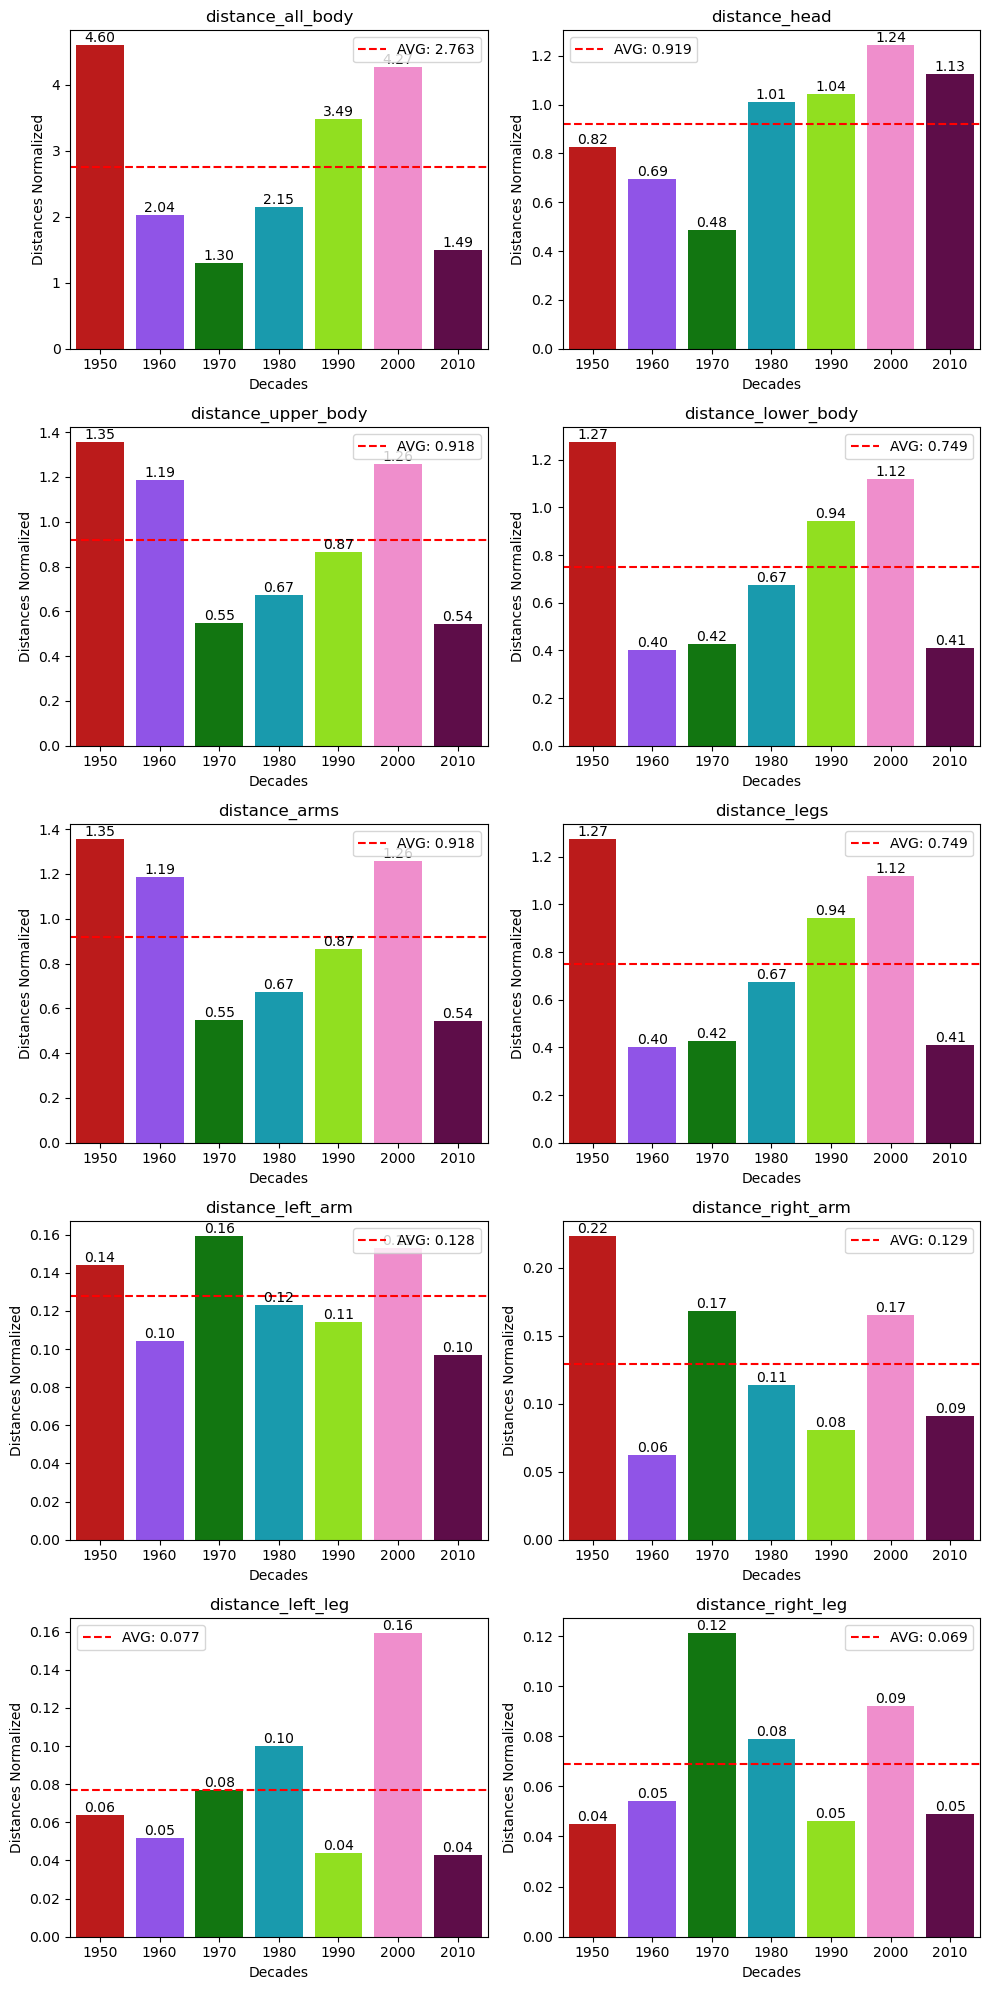

In [47]:
plot_multi(df_embed_decade_distances, l_features_distances, l_labels_decades, 'Distances', p_plots)

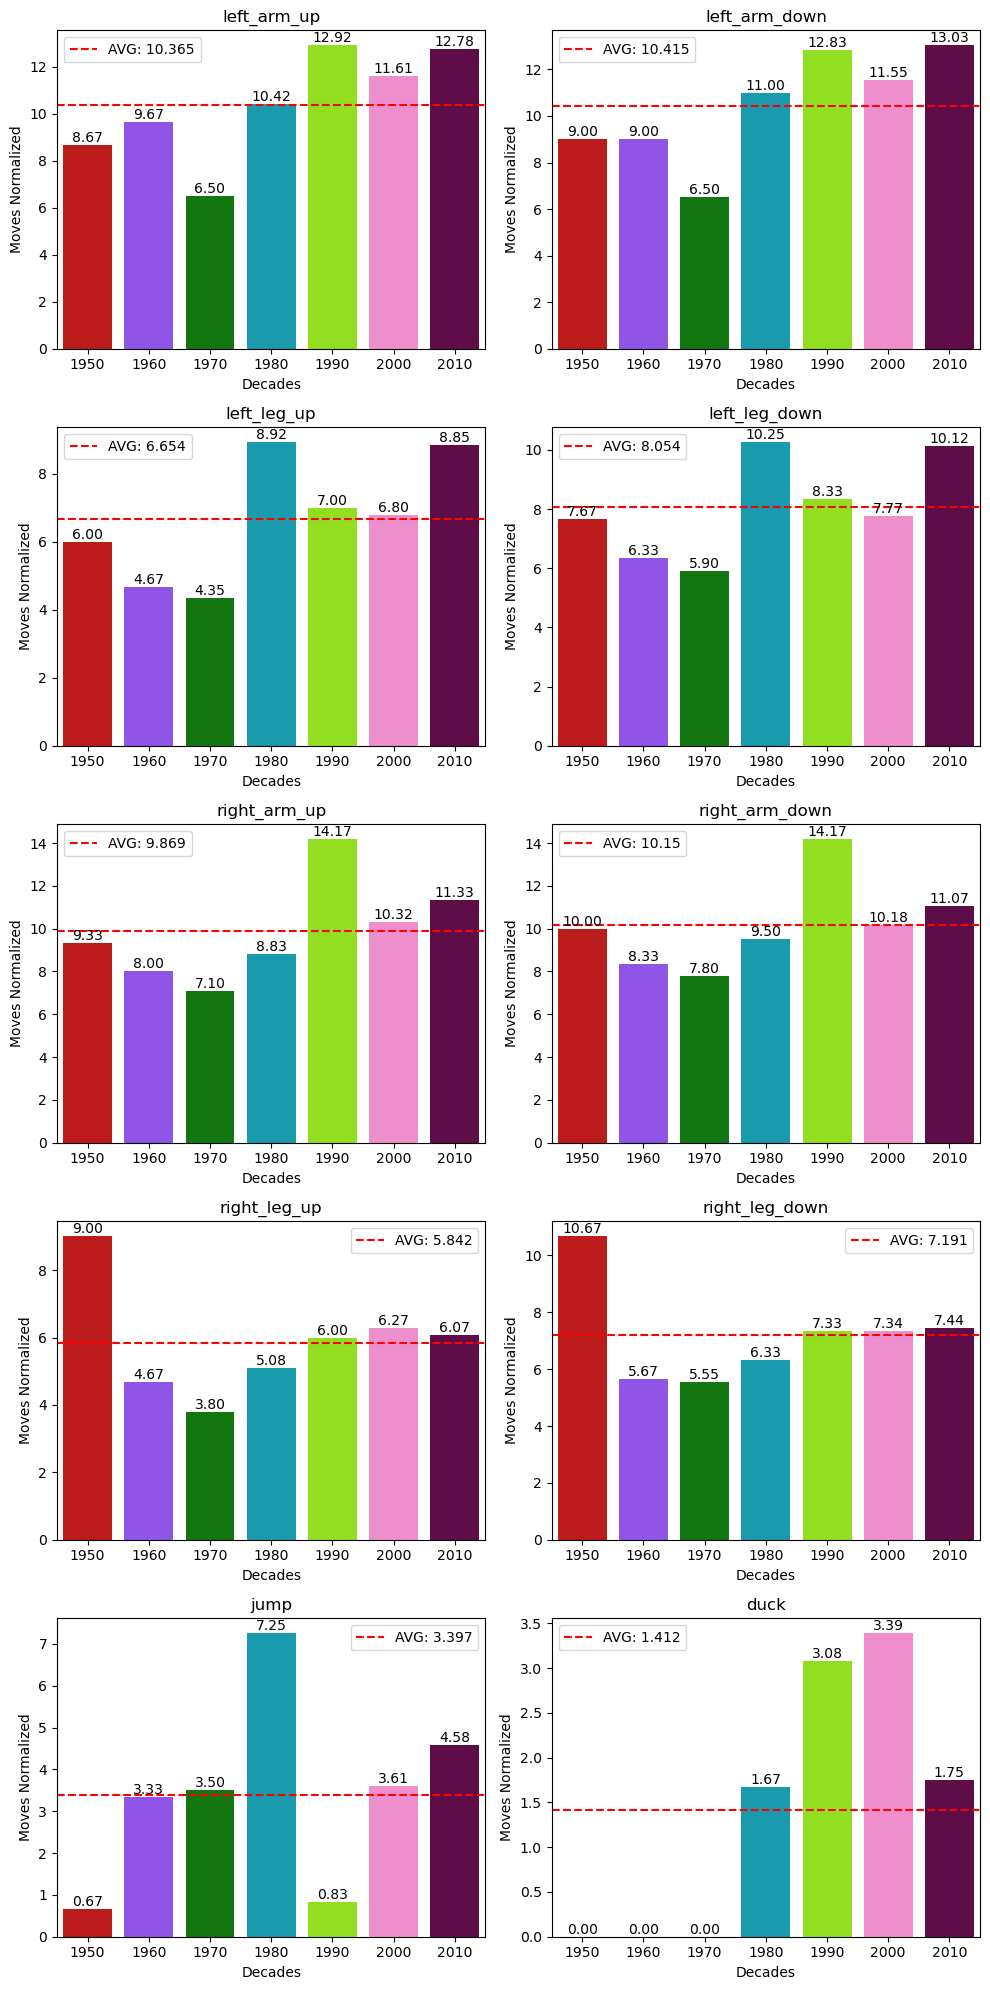

In [48]:
plot_multi(df_embed_decade_moves, l_features_moves, l_labels_decades, 'Moves', p_plots)

## Timeseries Analysis

In [49]:
# Timeseries data preprocess

df_embed_frame_states

frame_timestamp_global  frame_timestamp_local  i_video  i_entity  label  \
0                        145                      0        1         1   1950   
1                        150                      1        1         1   1950   
2                        155                      2        1         1   1950   
3                        160                      3        1         1   1950   
4                        165                      4        1         1   1950   
...                      ...                    ...      ...       ...    ...   
2842                    8725                     55       16        69   2010   
2843                    8730                     56       16        69   2010   
2844                    8735                     57       16        69   2010   
2845                    8740                     58       16        69   2010   
2846                    8745                     59       16        69   2010   

     state_left_arm_up state_left_arm_down state_left_leg_up  \
0                   up                  up              down   
1                   up                  up              down   
2                   up                  up                up   
3                 down                down                up   
4                 down                down                up   
...                ...                 ...               ...   
2842                up                  up              down   
2843                up                  up              down   
2844                up                  up              down   
2845                up                  up              down   
2846                up                  up              down   

     state_left_leg_down state_right_arm_up state_right_arm_down  \
0                   down               down                 down   
1                   down               down                 down   
2                     up               down                 down   
3                     up               down                 down   
4                     up               down                 down   
...                  ...                ...                  ...   
2842                down                 up                   up   
2843                down                 up                   up   
2844                down                 up                   up   
2845                down                 up                   up   
2846                down                 up                   up   

     state_right_leg_up state_right_leg_down state_jump state_duck  
0                  down                 down       down         up  
1                  down                 down       down         up  
2                  down                 down       down         up  
3                  down                 down       down         up  
4                  down                 down       down         up  
...                 ...                  ...        ...        ...  
2842               down                 down       down         up  
2843               down                 down       down         up  
2844               down                 down       down         up  
2845               down                 down       down         up  
2846               down                 down       down         up  

[2847 rows x 15 columns]

In [50]:
from tsfresh import extract_features, extract_relevant_features, select_features
from tsfresh.utilities.dataframe_functions import impute
from tsfresh.feature_extraction import ComprehensiveFCParameters
from saxpy.znorm import znorm
from saxpy.paa import paa
from saxpy.sax import ts_to_string
from tslearn.preprocessing import TimeSeriesScalerMeanVariance
from tslearn.piecewise import SymbolicAggregateApproximation
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

/home/edoli/.conda/envs/tfgpu_jup/lib/python3.9/site-packages/dask/dataframe/_pyarrow_compat.py:17: FutureWarning: Minimal version of pyarrow will soon be increased to 14.0.1. You are using 11.0.0. Please consider upgrading.
  warnings.warn(


In [51]:
def set_feature_value(srs_values):
    """
    apply function for setting timeseries multivariate variables values
    :param srs_values: current series
    """
    srs_values.replace(to_replace='up', value=1, inplace=True)
    srs_values.replace(to_replace='down', value=0, inplace=True)
    return srs_values

def set_timestamps(df_embed_frame, l_features, p_data1, s_title):
    """
    function sets timeseries format for analysis & evaluation
    :param df_embed_frame: current dataset
    :param l_features: features list
    :param p_data1: path to directory data
    :param s_title: name of timeseries dataset
    :return: timeseries dataframe format
    """
    p_output_timeseries = p_data1 + 'df' + '_timeseries_' + s_title + '.csv'
    df_embed_frame[l_features] = df_embed_frame[l_features].apply(set_feature_value, axis=1)
    df_timeseries = df_embed_frame.drop(columns=['i_video']).copy(deep=True)
    df_timeseries.to_csv(p_output_timeseries, index=False, header=True, na_rep='NA')
    return df_timeseries

In [52]:
s_timestamps = 'states'
df_timeseries = set_timestamps(df_embed_frame_states, l_features_states, p_data1, s_timestamps)
df_timeseries.head(5)

/tmp/ipykernel_3601593/86486979.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  srs_values.replace(to_replace='down', value=0, inplace=True)


frame_timestamp_global  frame_timestamp_local  i_entity  label  \
0                     145                      0         1   1950   
1                     150                      1         1   1950   
2                     155                      2         1   1950   
3                     160                      3         1   1950   
4                     165                      4         1   1950   

   state_left_arm_up  state_left_arm_down  state_left_leg_up  \
0                  1                    1                  0   
1                  1                    1                  0   
2                  1                    1                  1   
3                  0                    0                  1   
4                  0                    0                  1   

   state_left_leg_down  state_right_arm_up  state_right_arm_down  \
0                    0                   0                     0   
1                    0                   0                     0   
2                    1                   0                     0   
3                    1                   0                     0   
4                    1                   0                     0   

   state_right_leg_up  state_right_leg_down  state_jump  state_duck  
0                   0                     0           0           1  
1                   0                     0           0           1  
2                   0                     0           0           1  
3                   0                     0           0           1  
4                   0                     0           0           1

In [53]:
def split_timeseries(df_timeseries):
    """
    function splits timeseries data
    :param df_timeseries: current timeseries dataframe
    """
    y = df_timeseries['label'].copy(deep=True)
    x_timeseries = df_timeseries.drop(columns=['frame_timestamp_global', 'label']).copy(deep=True)
    df_timeseries = df_timeseries.reset_index()
    df_timeseries.set_index(['index', 'frame_timestamp_global'], inplace=True)
    x_timeseries_entity = x_timeseries.drop(columns=['frame_timestamp_local'], axis=1).copy(deep=True)
    x_np_timeseries_entity = x_timeseries_entity.drop(columns=['i_entity'], axis=1).copy(deep=True)
    x_np_timeseries = x_np_timeseries_entity.to_numpy()

    y_timeseries = pd.Series(name='label')
    y_size = len(x_timeseries.groupby(['i_entity']))
    for curr_subset_name, df_y_subset in df_timeseries.groupby(['label', 'i_entity']):
        curr_value_label = curr_subset_name[0]
        y_timeseries = pd.concat([y_timeseries, pd.Series([curr_value_label])])
    y_timeseries.index = np.arange(1, y_size + 1)

    return x_timeseries, y_timeseries, df_timeseries, y, x_timeseries_entity

In [54]:
x_timeseries, y_timeseries, df_timeseries, y, x_timeseries_entity = split_timeseries(df_timeseries)

/tmp/ipykernel_3601593/1659205728.py:18: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  y_timeseries = pd.concat([y_timeseries, pd.Series([curr_value_label])])


In [55]:
print(f'Timeseries x size: {x_timeseries.shape[0]}, y size: {y.shape[0]}')

Timeseries x size: 2847, y size: 2847


In [56]:
def check_missing_data(df):
    """
    function checks for missing values
    :param df: current dataframe
    """
    for curr_col in df.columns:
        count = df[curr_col].isnull().sum()
        print(f'Column: {curr_col} has {count} missing values.')

In [57]:
check_missing_data(x_timeseries)

Column: frame_timestamp_local has 0 missing values.
Column: i_entity has 0 missing values.
Column: state_left_arm_up has 0 missing values.
Column: state_left_arm_down has 0 missing values.
Column: state_left_leg_up has 0 missing values.
Column: state_left_leg_down has 0 missing values.
Column: state_right_arm_up has 0 missing values.
Column: state_right_arm_down has 0 missing values.
Column: state_right_leg_up has 0 missing values.
Column: state_right_leg_down has 0 missing values.
Column: state_jump has 0 missing values.
Column: state_duck has 0 missing values.


In [58]:
sum_entities = len(x_timeseries.groupby(['i_entity']))
print(f'Number of timeseries entities: {sum_entities}')

Number of timeseries entities: 69


In [59]:
def timeseries_entity(x_timeseries, x_timeseries_entity, p_output):
    """
    functions performs timeseries entity analysis
    :param x_timeseries: current timeseries data
    :param x_timeseries_entity: current timeseries entity data
    :param p_output: path to output directory
    :return: timeseries entity plot
    """
    p_curr = p_output + 'Timeseries/'
    if not os.path.exists(p_curr):
        os.makedirs(p_curr)
    sum_entities = len(x_timeseries.groupby(['i_entity']))
    print(f'Number of timeseries entities: {sum_entities}')
    d_plot_flag = {1950: False, 1960: False, 1970: False, 1980: False, 1990: False, 2000: False, 2010: False}
    for i, (curr_subset_name, df_y_subset) in enumerate(x_timeseries.groupby(['label', 'i_entity'])):
        curr_label = curr_subset_name[0]
        curr_entity = curr_subset_name[1]
        curr_title = f'{curr_label}_{curr_entity}'
        p_curr_output = p_curr+curr_title
        x_timeseries_entity[x_timeseries_entity['i_entity'] == curr_entity].plot(subplots=True, sharex=True, figsize=(10, 10))
        curr_plot_title = f'Time Series Decade: {curr_label}, Entity: {curr_entity}'
        plt.title(curr_plot_title)
        save_plot(plt, p_curr_output)
        if not d_plot_flag[curr_label]:
            plt.show()
            d_plot_flag[curr_label] = True
            print('-------------------------------------------------------------------------------------')
        plt.clf()

Number of timeseries entities: 69


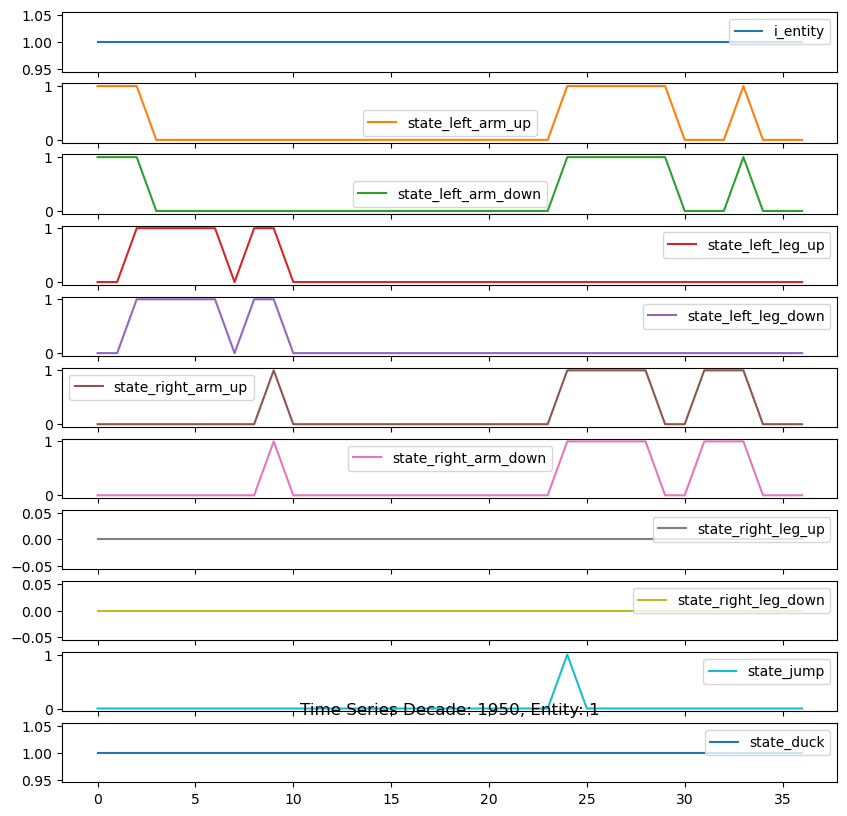

-------------------------------------------------------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

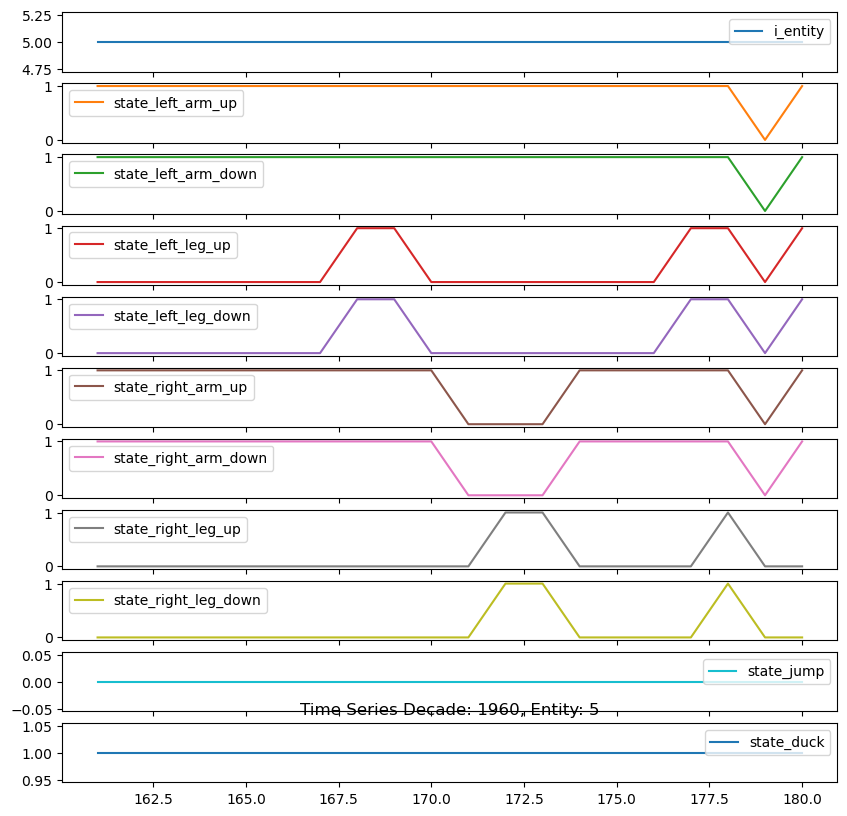

-------------------------------------------------------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

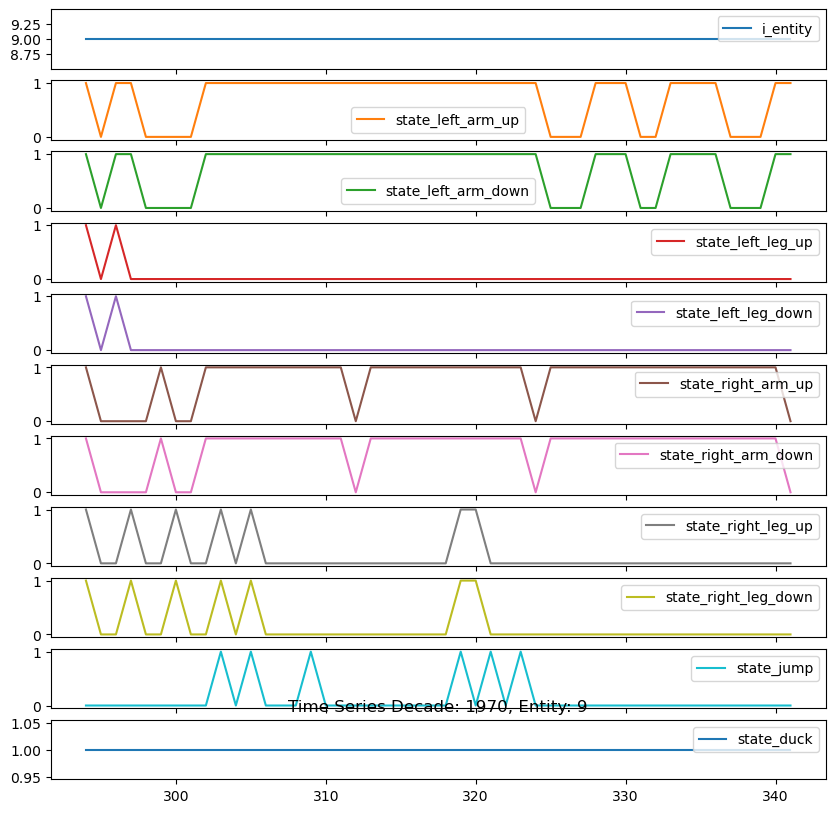

-------------------------------------------------------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

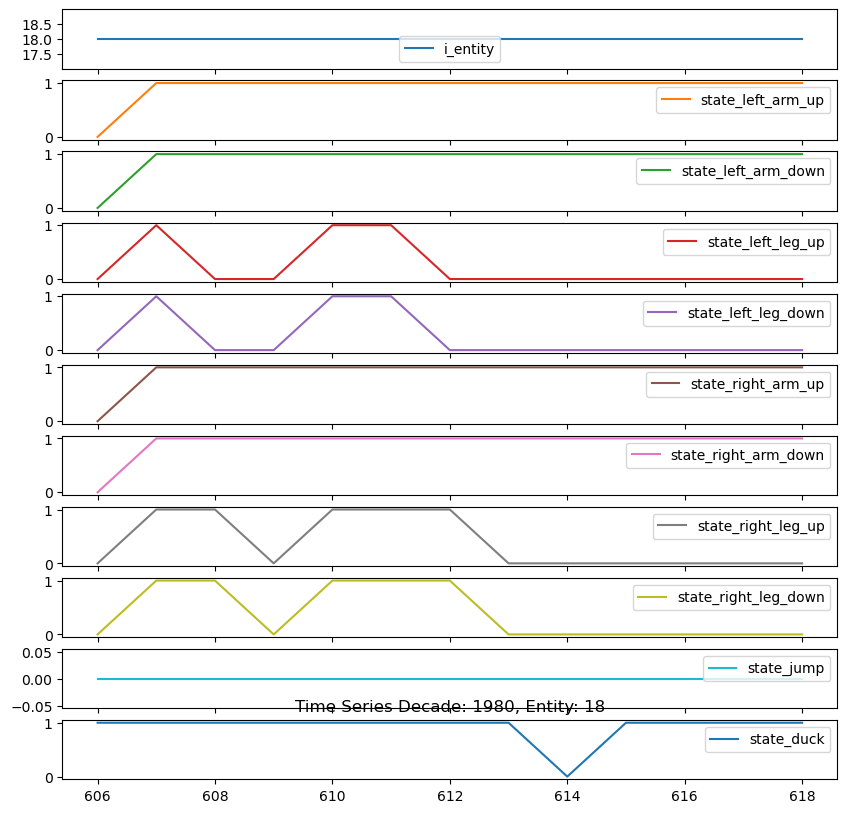

-------------------------------------------------------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

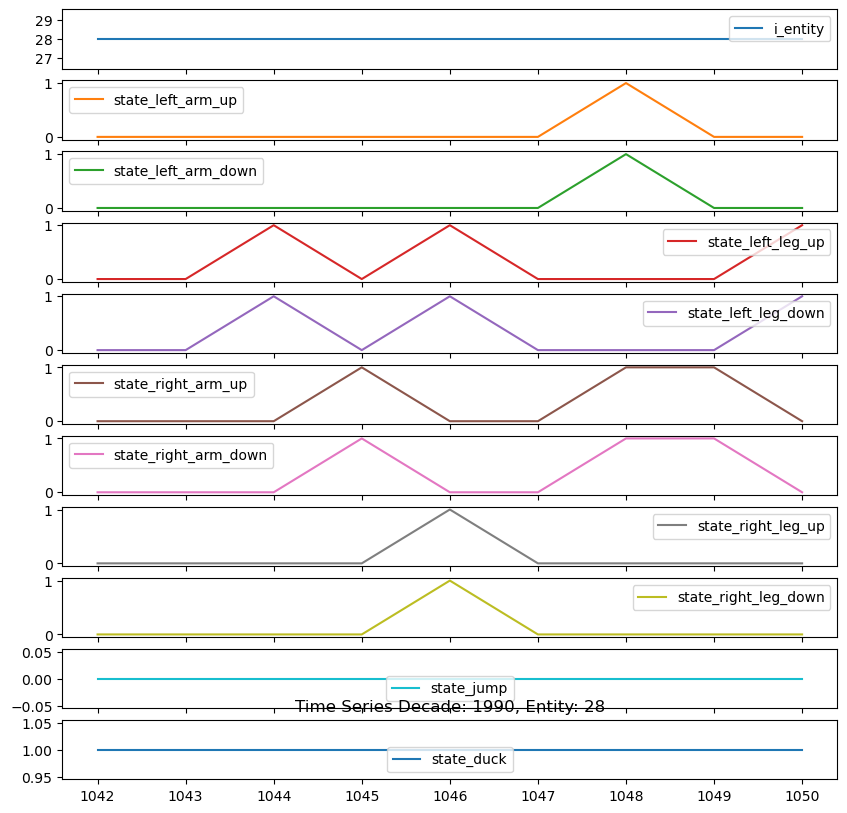

-------------------------------------------------------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

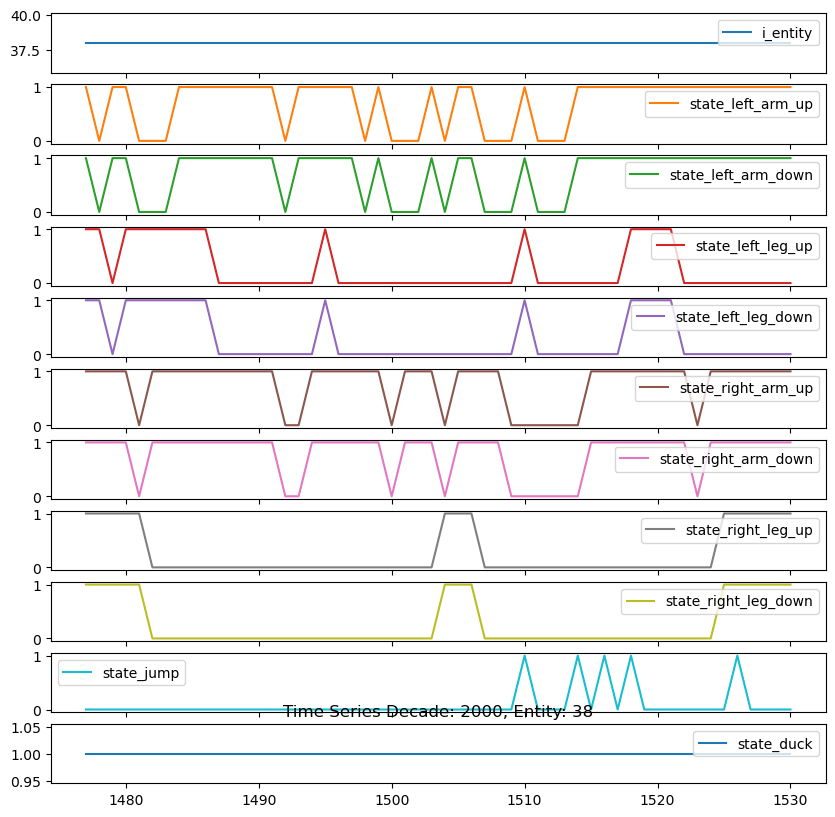

-------------------------------------------------------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

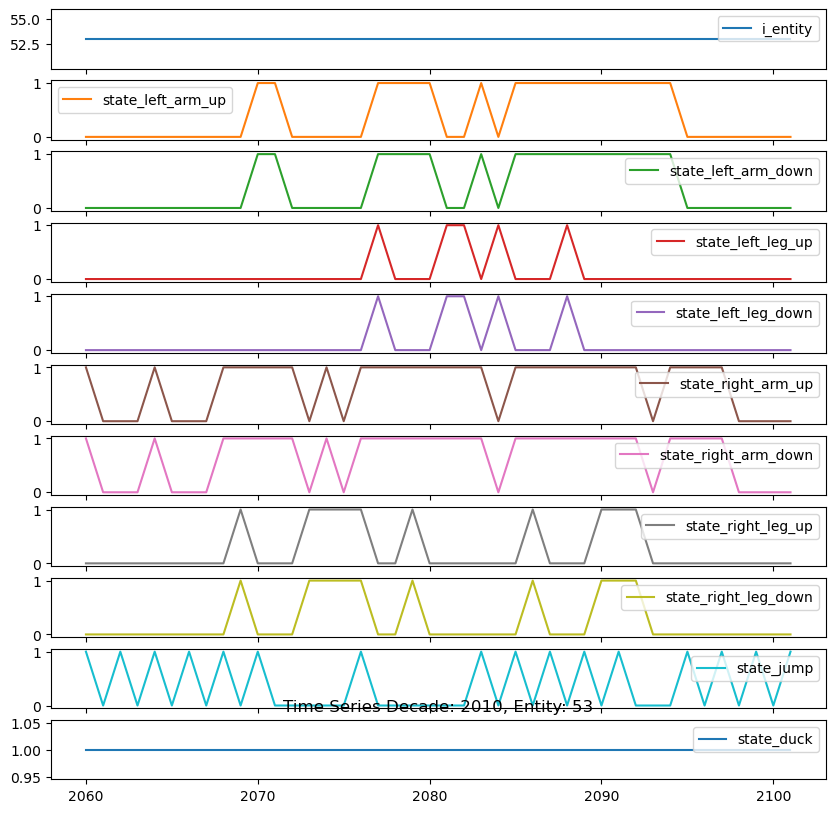

-------------------------------------------------------------------------------------


<Figure size 640x480 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

In [60]:
timeseries_entity(df_timeseries, x_timeseries_entity, p_plots)

## Timeseries Evaluation

In [61]:
x_timeseries

frame_timestamp_local  i_entity  state_left_arm_up  state_left_arm_down  \
0                         0         1                  1                    1   
1                         1         1                  1                    1   
2                         2         1                  1                    1   
3                         3         1                  0                    0   
4                         4         1                  0                    0   
...                     ...       ...                ...                  ...   
2842                     55        69                  1                    1   
2843                     56        69                  1                    1   
2844                     57        69                  1                    1   
2845                     58        69                  1                    1   
2846                     59        69                  1                    1   

      state_left_leg_up  state_left_leg_down  state_right_arm_up  \
0                     0                    0                   0   
1                     0                    0                   0   
2                     1                    1                   0   
3                     1                    1                   0   
4                     1                    1                   0   
...                 ...                  ...                 ...   
2842                  0                    0                   1   
2843                  0                    0                   1   
2844                  0                    0                   1   
2845                  0                    0                   1   
2846                  0                    0                   1   

      state_right_arm_down  state_right_leg_up  state_right_leg_down  \
0                        0                   0                     0   
1                        0                   0                     0   
2                        0                   0                     0   
3                        0                   0                     0   
4                        0                   0                     0   
...                    ...                 ...                   ...   
2842                     1                   0                     0   
2843                     1                   0                     0   
2844                     1                   0                     0   
2845                     1                   0                     0   
2846                     1                   0                     0   

      state_jump  state_duck  
0              0           1  
1              0           1  
2              0           1  
3              0           1  
4              0           1  
...          ...         ...  
2842           0           1  
2843           0           1  
2844           0           1  
2845           0           1  
2846           0           1  

[2847 rows x 12 columns]

In [62]:
def timeseries_evaluation(x_timeseries, y_timeseries):
    """
    functions performs timeseries evaluation
    :param x_timeseries: x timeseries data
    :param y_timeseries: y timeseries label
    :return: timeseries extracted features dataset
    """
    extraction_settings = ComprehensiveFCParameters()
    x_extracted = extract_features(x_timeseries, column_id='i_entity', column_sort='frame_timestamp_local',
                                   default_fc_parameters=extraction_settings,
                                   impute_function=impute)
    x_filtered = select_features(x_extracted, y_timeseries)
    return x_extracted, y_timeseries, x_filtered

def timeseries_classifier(x, x_filtered, y):
    """
    functions performs timeseries classification
    :param x: time series data
    :param x_filtered: timeseries data filtered
    :param y_timeseries: labels
    :return: timeseries extracted time interval patterns
    """
    x_full_train, x_full_test, y_train, y_test = train_test_split(x, y, test_size=.4)
    x_filtered_train, x_filtered_test = x_full_train[x_filtered.columns], x_full_test[x_filtered.columns]
    classifier_full = DecisionTreeClassifier()
    classifier_full.fit(x_full_train, y_train)
    print(classification_report(y_test, classifier_full.predict(x_full_test)))

In [63]:
x_extracted, y_timeseries, x_filtered = timeseries_evaluation(x_timeseries, y_timeseries)

Feature Extraction: 100%|█████████████████████████████████████████████████████████████████████| 30/30 [00:14<00:00,  2.14it/s]


In [64]:
print(f'Timeseries x extracted features size: {x_extracted.shape[0]}, x filtered: {x_filtered.shape[0]}, y size: {y_timeseries.shape[0]}')

Timeseries x extracted features size: 69, x filtered: 69, y size: 69


In [65]:
x_extracted

state_left_leg_up__variance_larger_than_standard_deviation  \
1                                                 0.0            
2                                                 0.0            
3                                                 0.0            
4                                                 0.0            
5                                                 0.0            
..                                                ...            
65                                                0.0            
66                                                0.0            
67                                                0.0            
68                                                0.0            
69                                                0.0            

    state_left_leg_up__has_duplicate_max  \
1                                    1.0   
2                                    1.0   
3                                    1.0   
4                                    1.0   
5                                    1.0   
..                                   ...   
65                                   0.0   
66                                   1.0   
67                                   1.0   
68                                   1.0   
69                                   1.0   

    state_left_leg_up__has_duplicate_min  state_left_leg_up__has_duplicate  \
1                                    1.0                               1.0   
2                                    1.0                               1.0   
3                                    1.0                               1.0   
4                                    1.0                               1.0   
5                                    1.0                               1.0   
..                                   ...                               ...   
65                                   1.0                               1.0   
66                                   1.0                               1.0   
67                                   1.0                               1.0   
68                                   1.0                               1.0   
69                                   1.0                               1.0   

    state_left_leg_up__sum_values  state_left_leg_up__abs_energy  \
1                             7.0                            7.0   
2                            11.0                           11.0   
3                             3.0                            3.0   
4                            11.0                           11.0   
5                             5.0                            5.0   
..                            ...                            ...   
65                            1.0                            1.0   
66                           10.0                           10.0   
67                           11.0                           11.0   
68                           16.0                           16.0   
69                            9.0                            9.0   

    state_left_leg_up__mean_abs_change  state_left_leg_up__mean_change  \
1                             0.111111                        0.000000   
2                             0.170213                        0.000000   
3                             0.208333                        0.041667   
4                             0.120000                        0.000000   
5                             0.263158                        0.052632   
..                                 ...                             ...   
65                            0.054054                        0.000000   
66                            0.125000                        0.000000   
67                            0.212121                        0.000000   
68                            0.309091                        0.018182   
69                            0.203390                        0.000000   

    state_left_leg_up__mean_second_deri

In [66]:
y_timeseries

1     1950
2     1950
3     1950
4     1950
5     1960
      ... 
65    2010
66    2010
67    2010
68    2010
69    2010
Length: 69, dtype: int64

In [67]:
timeseries_classifier(x_extracted, x_filtered, y_timeseries)

              precision    recall  f1-score   support

        1950       0.00      0.00      0.00         1
        1960       0.00      0.00      0.00         2
        1970       0.00      0.00      0.00         2
        1980       0.33      0.40      0.36         5
        1990       0.00      0.00      0.00         5
        2000       0.25      0.17      0.20         6
        2010       0.43      0.43      0.43         7

    accuracy                           0.21        28
   macro avg       0.14      0.14      0.14        28
weighted avg       0.22      0.21      0.21        28



/home/edoli/.conda/envs/tfgpu_jup/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/edoli/.conda/envs/tfgpu_jup/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/edoli/.conda/envs/tfgpu_jup/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} i

# Audio Dance Analysis

In [13]:
import json
import os
import zipfile
import glob
import pandas as pd
import numpy as np

import torch
import torchaudio
from torchaudio.transforms import Resample

from transformers import Wav2Vec2FeatureExtractor, Wav2Vec2Model

from tqdm import tqdm
import logging

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score, auc, roc_auc_score, roc_curve, confusion_matrix, ConfusionMatrixDisplay

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
if not os.path.exists('./datasets/'):
    !mkdir ./datasets

if not os.path.exists('./datasets/audio/'):
    !mkdir ./datasets/audio

p_project = '/sise/home/edoli/PycharmProjects/Video-Motion-Detector/'
p_data_audio = p_project+'datasets/audio/'

In [25]:
# after running first time remove your API_KEY
# api_token = {"username":"edolior", "key":""}
api_token = {"username":"edolior","key":"e42e6bd2bac00cfbb507c833d7ba22a9"}

# creating kaggle.json file with the personal API-Key details
# You can also put this file on your Google Drive
with open(p_project+'.kaggle/kaggle.json', 'w') as file:
    json.dump(api_token, file)

!chmod 600 /sise/home/edoli/PycharmProjects/Video-Motion-Detector/.kaggle/kaggle.json

In [26]:
if not os.path.exists('./datasets/audio/audio1'):
    !mkdir ./datasets/audio/audio1

if not os.path.exists('./datasets/audio/audio1/data'):
    !mkdir ./datasets/audio/audio1/data

if not os.path.exists('./datasets/audio/audio1/zip'):
    !mkdir ./datasets/audio/audio1/zip

if not os.path.exists('./datasets/audio/audio1/WAV'):
    !mkdir ./datasets/audio/audio1/WAV

In [ ]:
!kaggle datasets download andradaolteanu/gtzan-dataset-music-genre-classification -p ./datasets/audio/audio1/zip
!unzip ./datasets/audio/audio1/zip/*.zip -d ./datasets/audio/audio1/data
!ls ./datasets/audio/audio1/data

In [14]:
!rm ./datasets/audio/audio1/zip/gtzan-dataset-music-genre-classification.zip

In [6]:
p_df_audio = p_data_audio+'audio1/data/Data/features_30_sec.csv'
p_wav_audio_train = p_data_audio+'audio1/data/Data/genres_original/'
p_wav_audio_test = p_data_audio+'audio1/test/'

In [7]:
df_audio1 = pd.read_csv(p_df_audio)
df_audio1

filename  length  chroma_stft_mean  chroma_stft_var  rms_mean  \
0    blues.00000.wav  661794          0.350088         0.088757  0.130228   
1    blues.00001.wav  661794          0.340914         0.094980  0.095948   
2    blues.00002.wav  661794          0.363637         0.085275  0.175570   
3    blues.00003.wav  661794          0.404785         0.093999  0.141093   
4    blues.00004.wav  661794          0.308526         0.087841  0.091529   
..               ...     ...               ...              ...       ...   
995   rock.00095.wav  661794          0.352063         0.080487  0.079486   
996   rock.00096.wav  661794          0.398687         0.075086  0.076458   
997   rock.00097.wav  661794          0.432142         0.075268  0.081651   
998   rock.00098.wav  661794          0.362485         0.091506  0.083860   
999   rock.00099.wav  661794          0.358401         0.085884  0.054454   

      rms_var  spectral_centroid_mean  spectral_centroid_var  \
0    0.002827             1784.165850          129774.064525   
1    0.002373             1530.176679          375850.073649   
2    0.002746             1552.811865          156467.643368   
3    0.006346             1070.106615          184355.942417   
4    0.002303             1835.004266          343399.939274   
..        ...                     ...                    ...   
995  0.000345             2008.149458          282174.689224   
996  0.000588             2006.843354          182114.709510   
997  0.000322             2077.526598          231657.968040   
998  0.001211             1398.699344          240318.731073   
999  0.000336             1609.795082          422203.216152   

     spectral_bandwidth_mean  spectral_bandwidth_var  ...  mfcc16_var  \
0                2002.449060            85882.761315  ...   52.420910   
1                2039.036516           213843.755497  ...   55.356403   
2                1747.702312            76254.192257  ...   40.598766   
3                1596.412872           166441.494769  ...   44.427753   
4                1748.172116            88445.209036  ...   86.099236   
..                       ...                     ...  ...         ...   
995              2106.541053            88609.749506  ...   45.050526   
996              2068.942009            82426.016726  ...   33.851742   
997              1927.293153            74717.124394  ...   33.597008   
998              1818.450280           109090.207161  ...   46.324894   
999              1797.213044           120115.632927  ...   59.167755   

     mfcc17_mean  mfcc17_var  mfcc18_mean  mfcc18_var  mfcc19_mean  \
0      -1.690215   36.524071    -0.408979   41.597103    -2.303523   
1      -0.731125   60.314529     0.295073   48.120598    -0.283518   
2      -7.729093   47.639427    -1.816407   52.382141    -3.439720   
3      -3.319597   50.206673     0.636965   37.319130    -0.619121   
4      -5.454034   75.269707    -0.916874   53.613918    -4.404827   
..           ...         ...          ...         ...          ...   
995   -13.289984   41.754955     2.484145   36.778877    -6.713265   
996   -10.848309   39.395096     1.881229   32.010040    -7.461491   
997   -12.845291   36.367264     3.440978   36.001110   -12.588070   
998    -4.416050   43.583942     1.556207   34.331261    -5.041897   
999    -7.069775   73.760391     0.028346   76.504326    -2.025783   

     mfcc19_var  mfcc20_mean  mfcc20_var  label  
0     55.062923     1.221291   46.936035  blues  
1     51.106190     0.531217   45.786282  blues  
2     46.639660    -2.231258   30.573025  blues  
3     37.259739    -3.407448   31.949339  blues  
4     62.910812   -11.703234   55.195160  blues  
..          ...          ...         ...    ...  
995   54.866825    -1.193787   49.950665   rock  
996   39.196327    -2.795338   31.773624   rock  
997   42.502201    -2.106337   29.865515   rock  
998   47.227180    -3.590644   41.299088   rock  
999   72.189316     1.155239   49.662510   rock  


In [8]:
df_audio1 = df_audio1[['filename', 'tempo', 'label']]
df_audio1

filename       tempo  label
0    blues.00000.wav  123.046875  blues
1    blues.00001.wav   67.999589  blues
2    blues.00002.wav  161.499023  blues
3    blues.00003.wav   63.024009  blues
4    blues.00004.wav  135.999178  blues
..               ...         ...    ...
995   rock.00095.wav  103.359375   rock
996   rock.00096.wav  117.453835   rock
997   rock.00097.wav  129.199219   rock
998   rock.00098.wav   73.828125   rock
999   rock.00099.wav  123.046875   rock

[1000 rows x 3 columns]

In [ ]:
df['filename']=

In [9]:
def get_wav_paths(directory):
    image_paths = glob.glob(os.path.join(directory, '**', '*.wav'), recursive=True)
    image_paths.extend(glob.glob(os.path.join(directory, '**', '*.wav'), recursive=True))
    return image_paths

In [16]:
p_wav_train = get_wav_paths(p_wav_audio_train)
len(p_wav_train)
p_wav_train[:5]

['/sise/home/edoli/PycharmProjects/Video-Motion-Detector/datasets/audio/audio1/data/Data/genres_original/blues/blues.00000.wav',
 '/sise/home/edoli/PycharmProjects/Video-Motion-Detector/datasets/audio/audio1/data/Data/genres_original/blues/blues.00001.wav',
 '/sise/home/edoli/PycharmProjects/Video-Motion-Detector/datasets/audio/audio1/data/Data/genres_original/blues/blues.00002.wav',
 '/sise/home/edoli/PycharmProjects/Video-Motion-Detector/datasets/audio/audio1/data/Data/genres_original/blues/blues.00003.wav',
 '/sise/home/edoli/PycharmProjects/Video-Motion-Detector/datasets/audio/audio1/data/Data/genres_original/blues/blues.00004.wav']

In [14]:
def wav2vec(path):
  # Important: is better to find-tune this model.
  waveform, original_sample_rate = torchaudio.load(path)

  # Resample the audio to match the required sampling rate
  resampler = Resample(original_sample_rate, 16000)
  waveform = resampler(waveform)

  # Initialize the feature extractor and the model
  feature_extractor = Wav2Vec2FeatureExtractor.from_pretrained("facebook/wav2vec2-base-960h")
  model = Wav2Vec2Model.from_pretrained("facebook/wav2vec2-base-960h")

  # Preprocess the audio
  input_values = feature_extractor(waveform.squeeze(), sampling_rate=16000, return_tensors="pt").input_values

  # Generate audio embeddings
  with torch.no_grad():
      embeddings = model(input_values).last_hidden_state

  # The 'embeddings' variable now contains the vector embeddings for the sound file
  return embeddings.numpy()[0][0]

In [19]:
def get_label(p):
    i_start = p.rfind('/')
    i_end = p.find('.')
    curr_label = p[i_start+1:i_end]
    return curr_label

logging.getLogger("transformers").setLevel(logging.ERROR)
l_vectors = []
for p in tqdm(df_audio1['filename'].values):
    p_label = get_label(p)
    p_curr_wav = f'{p_wav_audio_train}{p_label}/{p}'
    l_vectors.append(wav2vec(p_curr_wav))

Downloading: 100%|████████████████████████████████████████████████████████████████████████████| 159/159 [00:00<00:00, 834kB/s]

Downloading: 100%|███████████████████████████████████████████████████████████████████████| 1.56k/1.56k [00:00<00:00, 10.3MB/s]

Downloading:   0%|                                                                                 | 0.00/360M [00:00<?, ?B/s]
Downloading:   0%|                                                                         | 143k/360M [00:00<04:29, 1.40MB/s]
Downloading:   0%|▏                                                                        | 745k/360M [00:00<01:30, 4.15MB/s]
Downloading:   1%|▋                                                                       | 3.50M/360M [00:00<00:24, 15.4MB/s]
Downloading:   3%|██                                                                      | 10.1M/360M [00:00<00:10, 36.5MB/s]
Downloading:   5%|███▎                                                                    | 16.8M/360M [00:00

RuntimeError: jaxlib is version 0.1.75, but this version of jax requires version >= 0.3.7.

In [ ]:
l_vectors[:10]

In [ ]:
df_audio1['vectors'] = l_vectors